In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # More Statistical Visualization 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/virat-kohli-all-international-cricket-centuries/Virat-Kohli-International-Cricket-Centuries.csv


# Gather data & Load Dataset

In [204]:
df = pd.read_csv('/kaggle/input/virat-kohli-all-international-cricket-centuries/Virat-Kohli-International-Cricket-Centuries.csv')
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


# Data Cleaning 
# Handle missing values and  Remove duplicates

In [205]:
df['Runs'] = df['Runs'].str.replace('*','').astype('int64')
df['Against'] = df['Against'].str.replace(' ','')

In [206]:
df.isnull().sum()

No.         0
Runs        0
Against     0
Position    0
Innings     0
Venue       0
Ground      1
Date        0
Result      0
dtype: int64

In [207]:
df.size,df.shape

(720, (80, 9))

In [208]:
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,SriLanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,NewZealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [209]:
df.columns

Index(['No.', 'Runs', 'Against', 'Position', 'Innings', 'Venue', 'Ground',
       'Date', 'Result'],
      dtype='object')

In [210]:
df['Against'].unique()

array(['SriLanka', 'Bangladesh', 'Australia', 'NewZealand', 'England',
       'WestIndies', 'Pakistan', 'Zimbabwe', 'SouthAfrica', 'Afghanistan'],
      dtype=object)

In [282]:
df['Ground'].unique()

array(['Home', 'Away', 'Neutral', nan], dtype=object)

In [295]:
df['Result'].unique()

array(['Won', 'Lost (D/L)', 'Lost', 'Drawn', 'Won (D/L)', 'Tied'],
      dtype=object)

# Statistics Analysis

In [307]:
df.groupby(['Ground','Result'])['Runs'].agg(['count','max','min','mean','median','sum','var','std'])

count  max  min        mean  median   sum          var  \
Ground  Result                                                               
Away    Drawn           5  169  105  132.200000   121.0   661   653.200000   
        Lost           10  153  103  124.600000   120.0  1246   301.377778   
        Lost (D/L)      1  107  107  107.000000   107.0   107          NaN   
        Won            19  200  100  120.894737   113.0  2297   589.766082   
        Won (D/L)       1  102  102  102.000000   102.0   102          NaN   
Home    Drawn           4  243  103  159.000000   145.0   636  4648.666667   
        Lost            3  123  107  117.000000   121.0   351    76.000000   
        Tied            1  157  157  157.000000   157.0   157          NaN   
        Won            29  254  100  141.068966   122.0  4091  1831.995074   
Neutral Won             6  183  107  129.166667   122.0   775   790.966667   

                          std  
Ground  Result                 
Away    Drawn       25.557778  
        Lost        17.360236  
        Lost (D/L)        NaN  
        Won         24.285100  
        Won (D/L)         NaN  
Home    Drawn       68.181131  
        Lost         8.717798  
        Tied              NaN  
        Won         42.801812  
Neutral Won         28.124130

In [304]:
df.groupby(['Against','Position'])['Runs'].agg(['count','max','min','mean','median','sum'])

count  max  min        mean  median   sum
Against     Position                                           
Afghanistan 2             1  122  122  122.000000   122.0   122
Australia   3             8  123  100  112.375000   115.5   899
            4             6  186  115  146.833333   144.0   881
            5             1  107  107  107.000000   107.0   107
            6             1  116  116  116.000000   116.0   116
Bangladesh  3             4  136  102  113.500000   108.0   454
            4             3  204  100  146.666667   136.0   440
England     3             1  122  122  122.000000   122.0   122
            4             6  235  103  145.500000   130.5   873
            5             1  103  103  103.000000   103.0   103
NewZealand  3             6  154  105  122.166667   119.0   733
            4             2  211  105  158.000000   158.0   316
            5             1  103  103  103.000000   103.0   103
Pakistan    3             3  183  107  137.333333   122.0   412
SouthAfrica 3             5  160  101  128.000000   129.0   640
            4             3  254  119  175.333333   153.0   526
SriLanka    3             7  166  106  123.142857   113.0   862
            4             8  243  103  143.125000   120.0  1145
WestIndies  3             8  157  102  122.250000   117.0   978
            4             4  200  117  144.250000   130.0   577
Zimbabwe    3             1  115  115  115.000000   115.0   115

In [308]:
df.groupby(['Against','Position','Result'])['Runs'].agg(['count','max','min','mean','median','sum'])

count  max  min        mean  median  sum
Against     Position Result                                              
Afghanistan 2        Won             1  122  122  122.000000   122.0  122
Australia   3        Lost            3  123  106  115.333333   117.0  346
                     Won             5  118  100  110.600000   115.0  553
            4        Drawn           3  186  147  167.333333   169.0  502
                     Lost            3  141  115  126.333333   123.0  379
            5        Won             1  107  107  107.000000   107.0  107
            6        Lost            1  116  116  116.000000   116.0  116
Bangladesh  3        Won             4  136  102  113.500000   108.0  454
            4        Won             3  204  100  146.666667   136.0  440
England     3        Won             1  122  122  122.000000   122.0  122
            4        Lost            1  149  149  149.000000   149.0  149
                     Lost (D/L)      1  107  107  107.000000   107.0  107
                     Won             4  235  103  154.250000   139.5  617
            5        Drawn           1  103  103  103.000000   103.0  103
NewZealand  3        Lost            2  123  121  122.000000   122.0  244
                     Won             4  154  105  122.250000   115.0  489
            4        Drawn           1  105  105  105.000000   105.0  105
                     Won             1  211  211  211.000000   211.0  211
            5        Won             1  103  103  103.000000   103.0  103
Pakistan    3        Won             3  183  107  137.333333   122.0  412
SouthAfrica 3        Won             5  160  101  128.000000   129.0  640
            4        Drawn           1  119  119  119.000000   119.0  119
                     Lost            1  153  153  153.000000   153.0  153
                     Won             1  254  254  254.000000   254.0  254
SriLanka    3        Won             7  166  106  123.142857   113.0  862
            4        Drawn           2  243  104  173.500000   173.5  347
                     Lost            1  103  103  103.000000   103.0  103
                     Won             5  213  103  139.000000   133.0  695
WestIndies  3        Lost            1  107  107  107.000000   107.0  107
                     Tied            1  157  157  157.000000   157.0  157
                     Won             5  140  111  122.400000   120.0  612
                     Won (D/L)       1  102  102  102.000000   102.0  102
            4        Drawn           1  121  121  121.000000   121.0  121
                     Won             3  200  117  152.000000   139.0  456
Zimbabwe    3        Won             1  115  115  115.000000   115.0  115

In [309]:
df.columns

Index(['Runs', 'Against', 'Position', 'Innings', 'Venue', 'Ground', 'Date',
       'Result'],
      dtype='object')

In [322]:
pd.pivot_table(df[df['Result'].isin(['Won','Lost'])],index=['Against'],columns='Result',values=['Runs'],aggfunc=['mean','sum','min','max'])

mean                sum            min           max       
                   Runs               Runs           Runs          Runs       
Result             Lost         Won   Lost     Won   Lost    Won   Lost    Won
Against                                                                       
Afghanistan         NaN  122.000000    NaN   122.0    NaN  122.0    NaN  122.0
Australia    120.142857  110.000000  841.0   660.0  106.0  100.0  141.0  118.0
Bangladesh          NaN  127.714286    NaN   894.0    NaN  100.0    NaN  204.0
England      149.000000  147.800000  149.0   739.0  149.0  103.0  149.0  235.0
NewZealand   122.000000  133.833333  244.0   803.0  121.0  103.0  123.0  211.0
Pakistan            NaN  137.333333    NaN   412.0    NaN  107.0    NaN  183.0
SouthAfrica  153.000000  149.000000  153.0   894.0  153.0  101.0  153.0  254.0
SriLanka     103.000000  129.750000  103.0  1557.0  103.0  103.0  103.0  213.0
WestIndies   107.000000  133.500000  107.0  1068.0  107.0  111.0  107.0  200.0
Zimbabwe            NaN  115.000000    NaN   115.0    NaN  115.0    NaN  115.0

# Centuries Percentage of Winning Vs Lost:-

In [299]:
w_l_data = df[df['Result']=='Won']  # Lost , Won
w_l_data

,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,107,SriLanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,105,NewZealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won
6,112,England,4,2,"Feroz Shah Kotla Ground, Delhi",Home,17-Oct-11,Won
7,117,WestIndies,4,2,"APCA-VDCA Stadium, Visakhapatnam",Home,02-Dec-11,Won
9,133,SriLanka,4,2,"Bellerive Oval, Hobart",Neutral,28-Feb-12,Won
10,108,SriLanka,3,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Neutral,13-Mar-12,Won
11,183,Pakistan,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Neutral,18-Mar-12,Won


<Axes: xlabel='Innings', ylabel='Runs'>

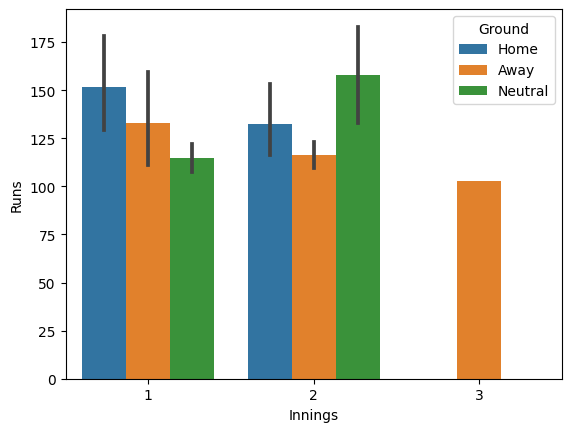

In [300]:
sns.barplot(x='Innings',y="Runs",hue='Ground',data=w_l_data)

<Axes: xlabel='Innings', ylabel='Runs'>

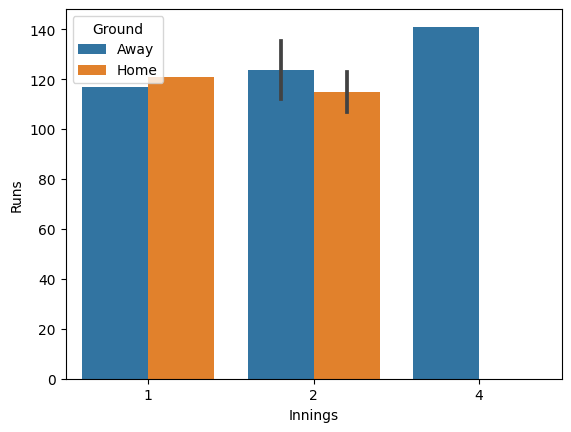

In [298]:
sns.barplot(x='Innings',y="Runs",hue='Ground',data=w_l_data)

<Axes: xlabel='Position', ylabel='count'>

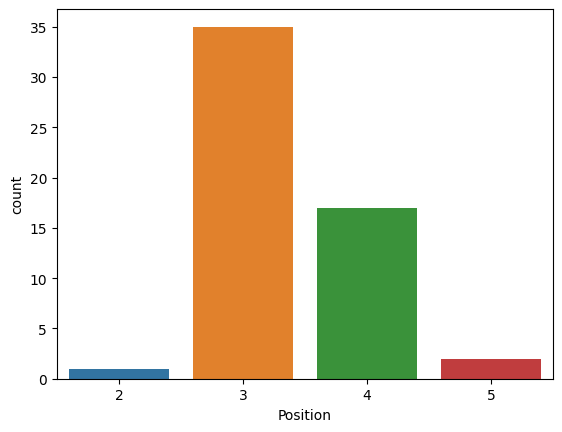

In [301]:
sns.countplot(x='Position',data=w_l_data) # Position, Innings

<Axes: xlabel='Position', ylabel='count'>

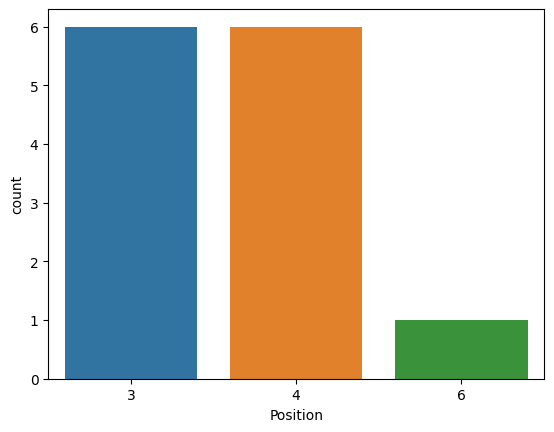

In [297]:
sns.countplot(x='Position',data=w_l_data) # Position, Innings

# Centuries OverView  Home Vs Away Vs Neutral

In [287]:
ground_data = df[df['Ground']=='Away']
ground_data

,Runs,Against,Position,Innings,Venue,Ground,Date,Result
1,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
4,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won
5,107,England,4,1,"Sophia Gardens, Cardiff",Away,16-Sep-11,Lost (D/L)
8,116,Australia,6,2,"Adelaide Oval, Adelaide",Away,24-Jan-12,Lost
12,106,SriLanka,3,1,"MRIC Stadium, Hambantota",Away,21-Jul-12,Won
13,128,SriLanka,3,2,"R. Premadasa Stadium, Colombo",Away,31-Jul-12,Won
17,102,WestIndies,3,1,"Queen's Park Oval, Port of Spain",Away,05-Jul-13,Won (D/L)
18,115,Zimbabwe,3,2,"Harare Sports Club, Harare",Away,24-Jul-13,Won
21,119,SouthAfrica,4,1,"Wanderers Stadium, Johannesburg",Away,18-Dec-13,Drawn
22,123,NewZealand,3,2,"McLean Park, Napier",Away,19-Jan-14,Lost


<Axes: xlabel='Result', ylabel='count'>

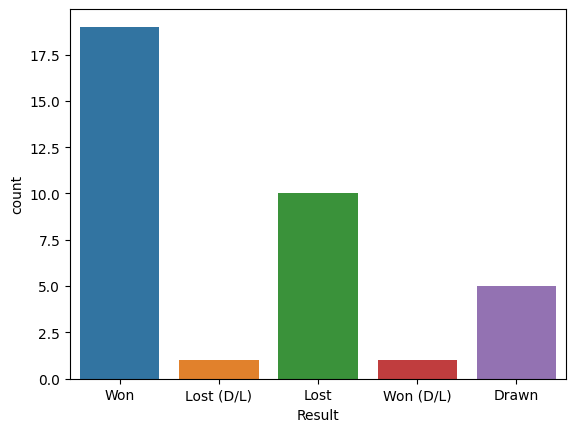

In [294]:
sns.countplot(x='Result',data=ground_data)

<Axes: ylabel='Runs'>

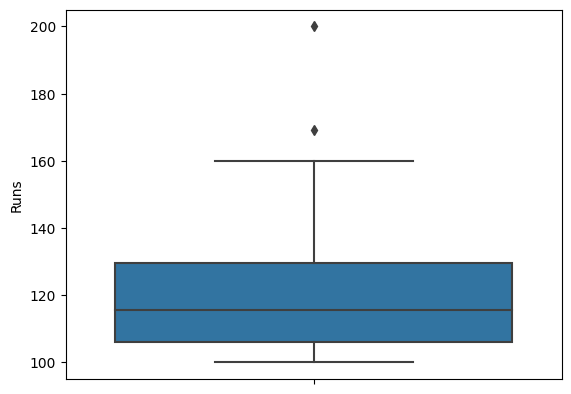

In [293]:
sns.boxplot(y='Runs',data=ground_data)

<Axes: xlabel='Against', ylabel='count'>

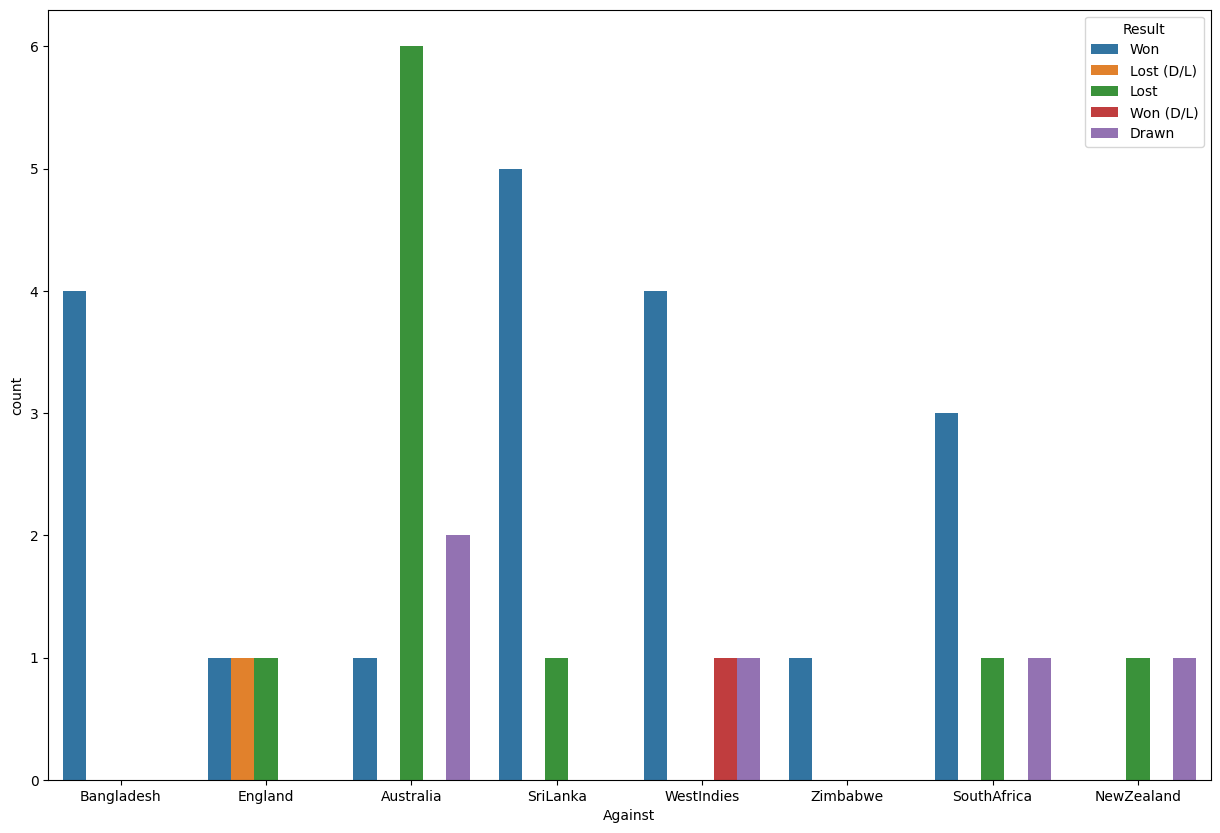

In [292]:
plt.figure(figsize=(15,10))
sns.countplot(x='Against',hue="Result",data=ground_data)

<Axes: xlabel='Against', ylabel='Runs'>

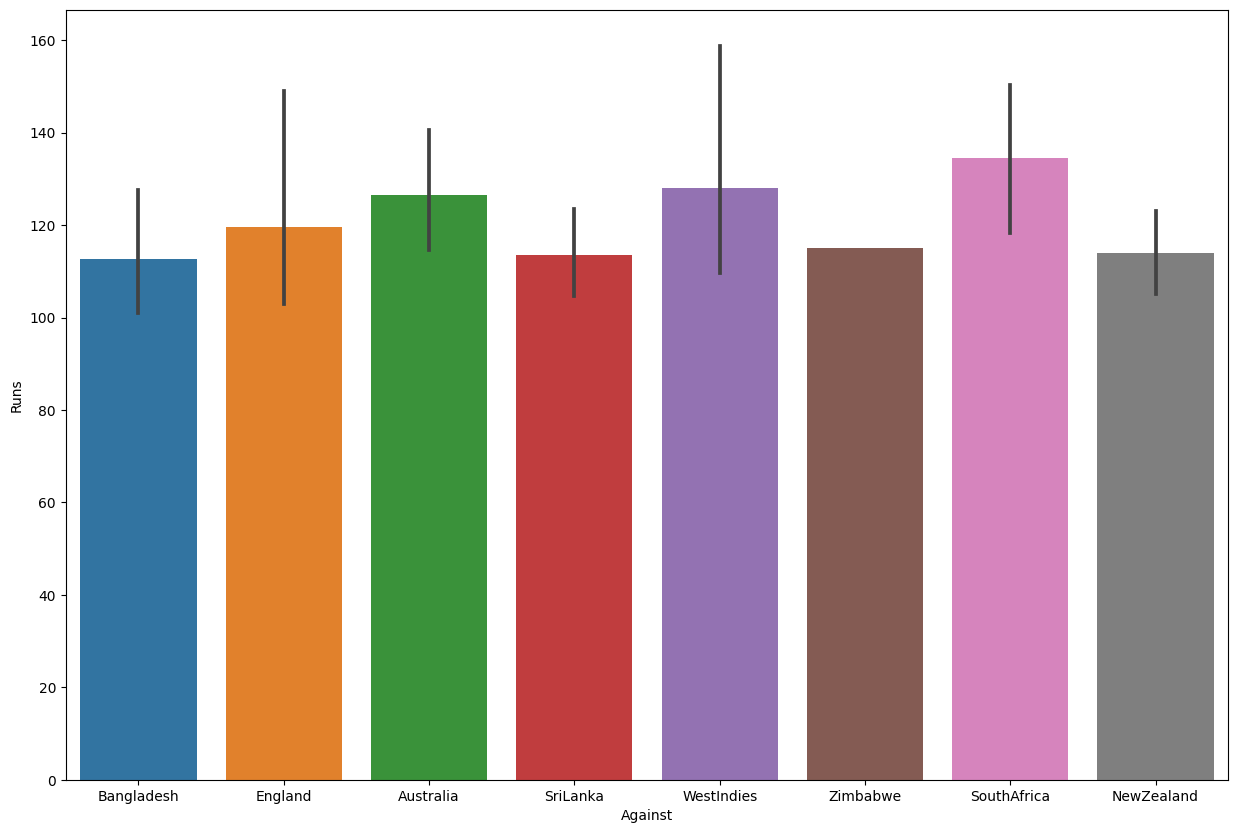

In [288]:
plt.figure(figsize=(15,10))
sns.barplot(x='Against',y='Runs',data=ground_data)

<Axes: xlabel='Against', ylabel='Runs'>

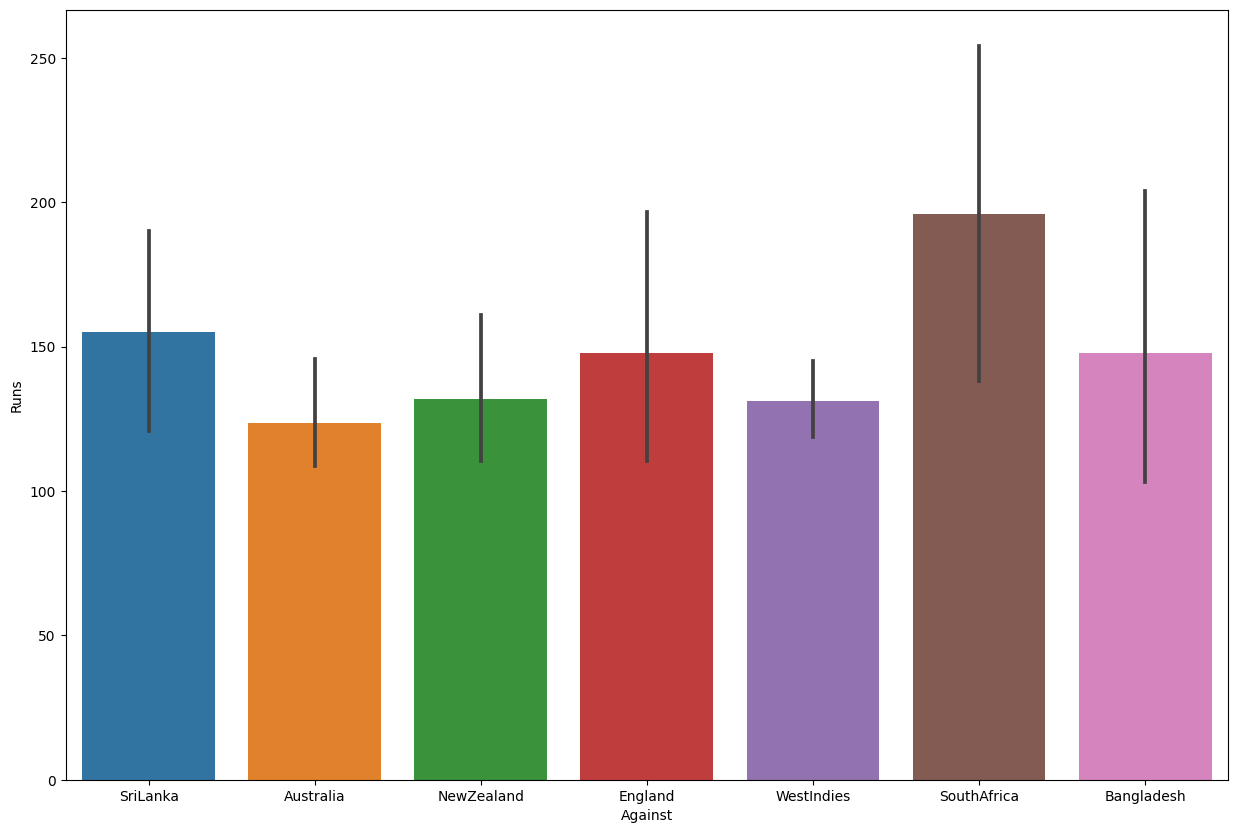

In [286]:
plt.figure(figsize=(15,10))
sns.barplot(x='Against',y='Runs',data=ground_data)

# Hit Centuries based On per Inning OverView:-

In [274]:
inning_data = df[df['Innings'].isin([2,3])]
inning_data

,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,107,SriLanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
6,112,England,4,2,"Feroz Shah Kotla Ground, Delhi",Home,17-Oct-11,Won
7,117,WestIndies,4,2,"APCA-VDCA Stadium, Visakhapatnam",Home,02-Dec-11,Won
8,116,Australia,6,2,"Adelaide Oval, Adelaide",Away,24-Jan-12,Lost
9,133,SriLanka,4,2,"Bellerive Oval, Hobart",Neutral,28-Feb-12,Won
11,183,Pakistan,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Neutral,18-Mar-12,Won
13,128,SriLanka,3,2,"R. Premadasa Stadium, Colombo",Away,31-Jul-12,Won
14,103,NewZealand,5,2,"M. Chinnaswamy Stadium, Bangalore",Home,31-Aug-12,Won


<Axes: >

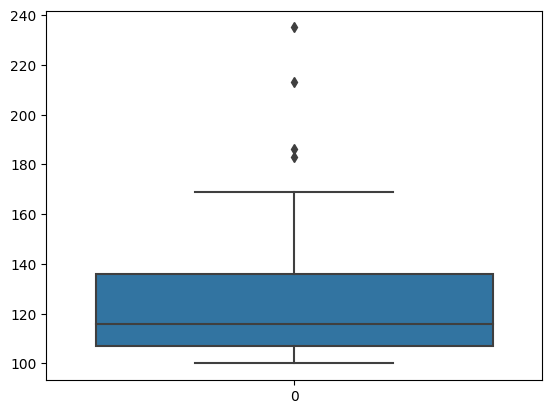

In [278]:
sns.boxplot(inning_data['Runs'])

<Axes: xlabel='Position', ylabel='count'>

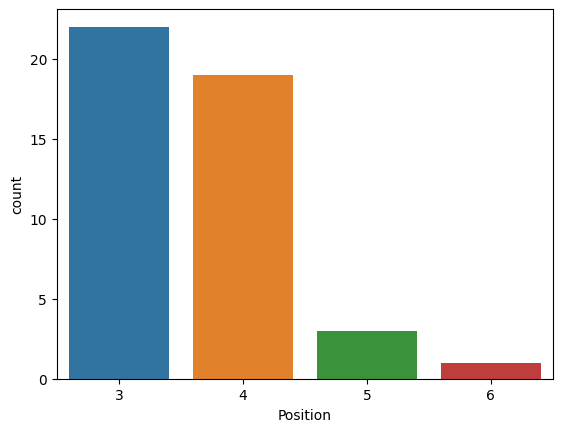

In [279]:
sns.countplot(x='Position',data=inning_data)

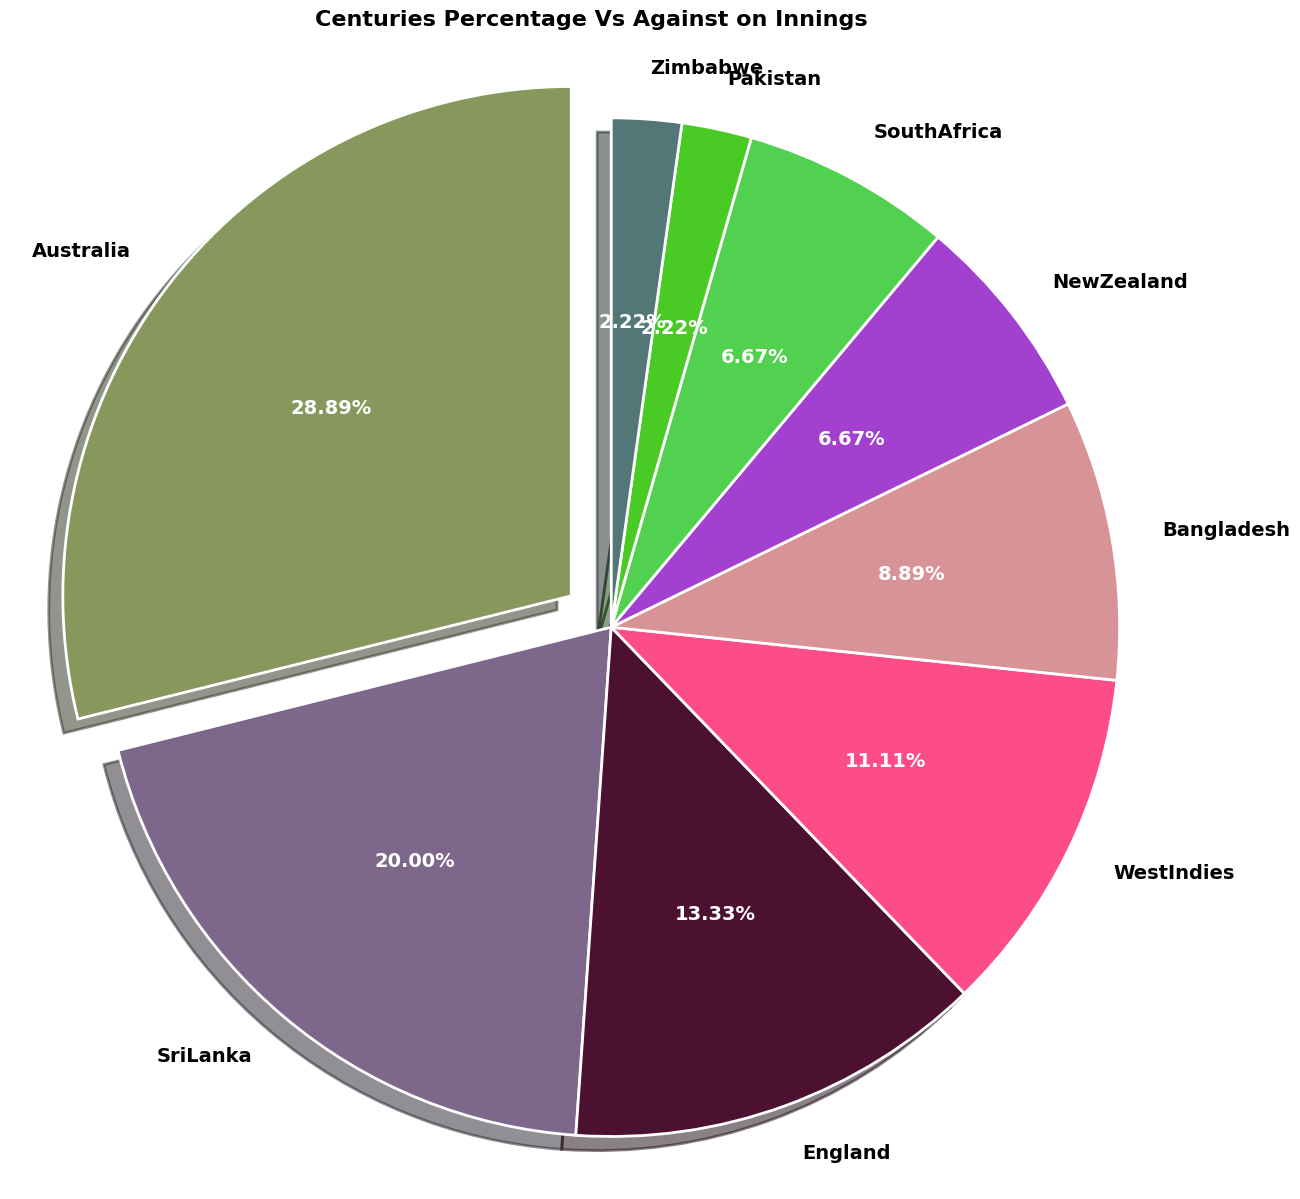

In [275]:
dic_data = dict(inning_data.Against.value_counts())
labels = list(dic_data.keys())
sizes = list(dic_data.values())
# Generate a list of random colors
colors = [random_color() for _ in labels]

# Create an explode tuple the same length as labels, with the first item exploded
explode = (0.1,) + (0,) * (len(labels) - 1)
# ....................................................
# ...................................................
# Create a figure with a white background
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels,
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold', color='black')  # Set text color to white
    autotext.set(size=14, weight='bold', color='white')  # Set autotext color to white


# Add a title
ax.set_title('Centuries Percentage Vs Against on Innings', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

<Axes: xlabel='Ground', ylabel='Runs'>

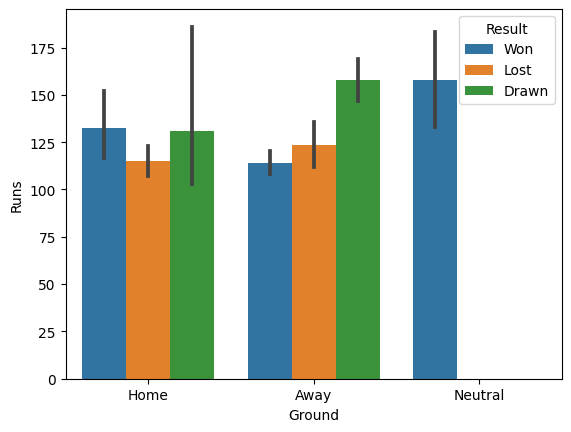

In [281]:
sns.barplot(x='Ground',y='Runs',hue='Result',data=inning_data)

# Score More than 100 Centuries overview:- 

In [266]:
score_data = df[df['Runs']>110]
score_data.head(10)

,Runs,Against,Position,Innings,Venue,Ground,Date,Result
2,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
6,112,England,4,2,"Feroz Shah Kotla Ground, Delhi",Home,17-Oct-11,Won
7,117,WestIndies,4,2,"APCA-VDCA Stadium, Visakhapatnam",Home,02-Dec-11,Won
8,116,Australia,6,2,"Adelaide Oval, Adelaide",Away,24-Jan-12,Lost
9,133,SriLanka,4,2,"Bellerive Oval, Hobart",Neutral,28-Feb-12,Won
11,183,Pakistan,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Neutral,18-Mar-12,Won
13,128,SriLanka,3,2,"R. Premadasa Stadium, Colombo",Away,31-Jul-12,Won
18,115,Zimbabwe,3,2,"Harare Sports Club, Harare",Away,24-Jul-13,Won
20,115,Australia,3,2,"VCA Stadium, Nagpur",Home,30-Oct-13,Won
21,119,SouthAfrica,4,1,"Wanderers Stadium, Johannesburg",Away,18-Dec-13,Drawn


<Axes: xlabel='Innings', ylabel='Runs'>

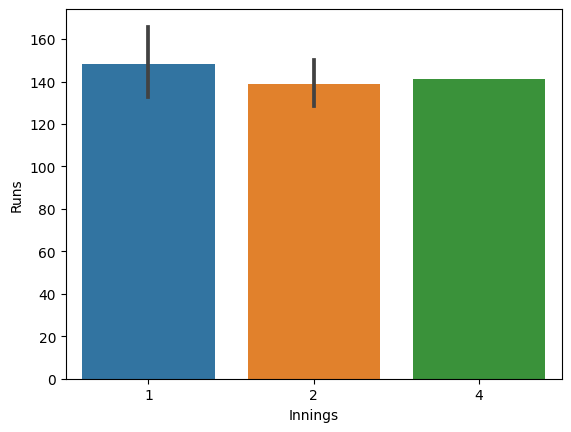

In [272]:
sns.barplot(x='Innings',y='Runs',data=score_data)

<Axes: xlabel='Innings', ylabel='Runs'>

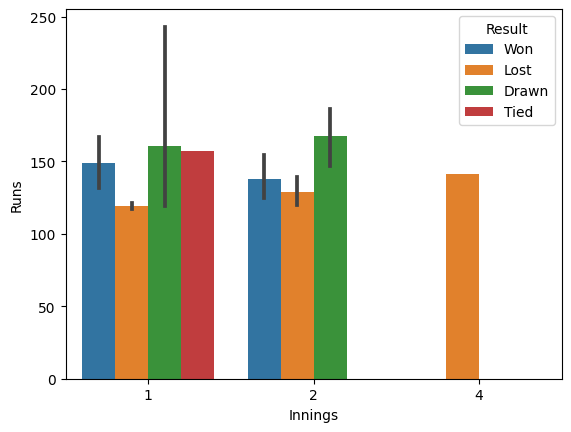

In [273]:
sns.barplot(x='Innings',hue='Result',y='Runs',data=score_data)

<Axes: xlabel='Innings', ylabel='count'>

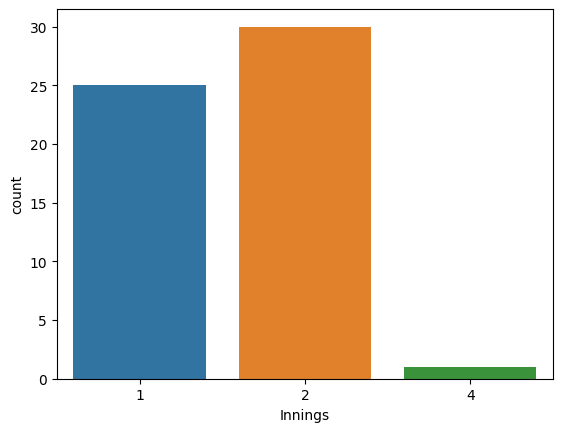

In [268]:
sns.countplot(x='Innings',data=score_data)

In [267]:
score_data[score_data['Position'].isin([3])]

,Runs,Against,Position,Innings,Venue,Ground,Date,Result
2,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
11,183,Pakistan,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Neutral,18-Mar-12,Won
13,128,SriLanka,3,2,"R. Premadasa Stadium, Colombo",Away,31-Jul-12,Won
18,115,Zimbabwe,3,2,"Harare Sports Club, Harare",Away,24-Jul-13,Won
20,115,Australia,3,2,"VCA Stadium, Nagpur",Home,30-Oct-13,Won
22,123,NewZealand,3,2,"McLean Park, Napier",Away,19-Jan-14,Lost
24,136,Bangladesh,3,2,"Khan Shaheb Osman Ali Stadium, Fatullah",Away,26-Feb-14,Won
25,127,WestIndies,3,1,"HPCA Stadium, Dharamshala",Home,17-Oct-14,Won
33,138,SouthAfrica,3,1,"M. A. Chidambaram Stadium, Chennai",Home,22-Oct-15,Won
34,117,Australia,3,1,"Melbourne Cricket Ground, Melbourne",Away,17-Jan-16,Lost


<Axes: xlabel='Innings', ylabel='count'>

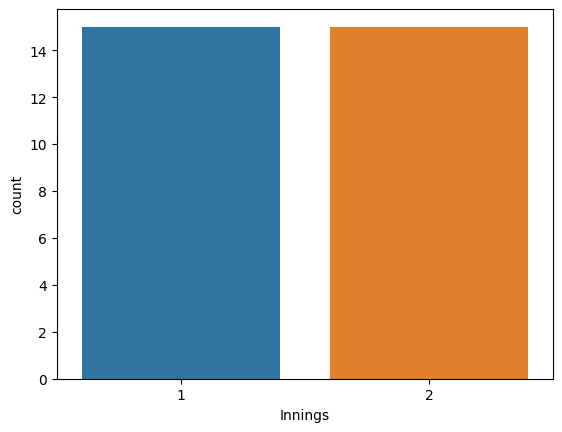

In [269]:
sns.countplot(x='Innings',data=score_data[score_data['Position'].isin([3])])

# At Position Centuries Overview:-

In [250]:
position_data = df[df['Position']==3]  # .count()
position_data.head()

,Runs,Against,Position,Innings,Venue,Ground,Date,Result
1,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,105,NewZealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
10,108,SriLanka,3,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Neutral,13-Mar-12,Won
11,183,Pakistan,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Neutral,18-Mar-12,Won


<Axes: xlabel='Ground', ylabel='count'>

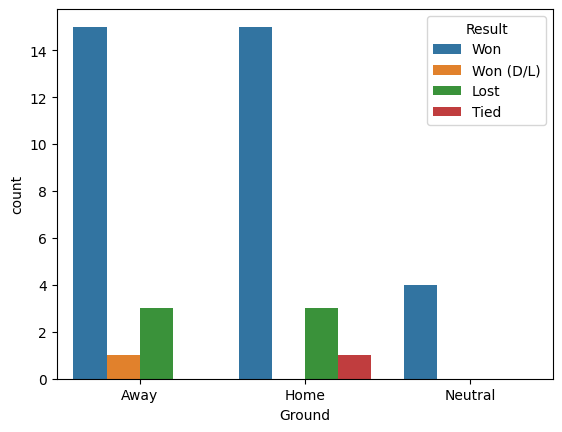

In [259]:
sns.countplot(x='Ground',hue='Result',data=position_data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Result', ylabel='Count'>

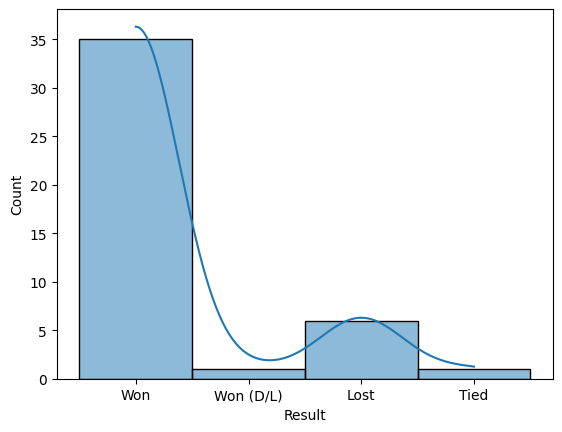

In [256]:
sns.histplot(position_data['Result'],kde=True)

# Against Team Centuries Overview:-

In [212]:
df[(df['Against']=='SriLanka') & (df['Position'].isin([4]))]  

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,SriLanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
9,10,133,SriLanka,4,2,"Bellerive Oval, Hobart",Neutral,28-Feb-12,Won
26,27,139,SriLanka,4,2,"JSCA International Stadium, Ranchi",Home,16-Nov-14,Won
32,33,103,SriLanka,4,2,"Galle International Stadium, Galle",Away,12-Aug-15,Lost
44,45,103,SriLanka,4,3,"Galle International Stadium, Galle",Away,26-Jul-17,Won
49,50,104,SriLanka,4,3,"Eden Gardens, Kolkata",Home,16-Nov-17,Drawn
50,51,213,SriLanka,4,2,"Vidarbha Cricket Association Stadium, Nagpur",Home,24-Nov-17,Won
51,52,243,SriLanka,4,1,"Feroz Shah Kotla Ground, Delhi",Home,02-Dec-17,Drawn


[Text(0, 0, '12'), Text(0, 0, '1'), Text(0, 0, '2')]


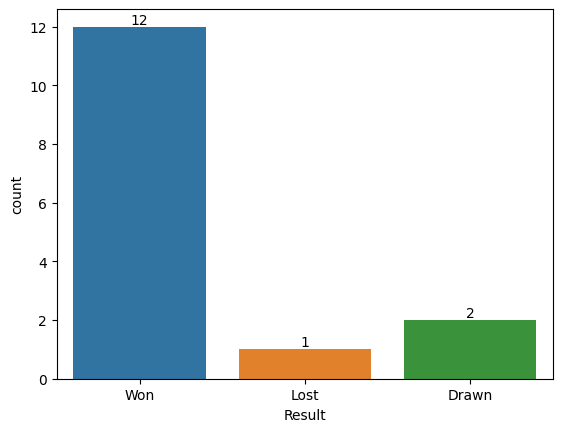

In [213]:
against_data = df[(df['Against']=='SriLanka')]

data = sns.countplot(x='Result',data=against_data)
for i in data.containers:
    print(data.bar_label(i))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Result', ylabel='Runs'>

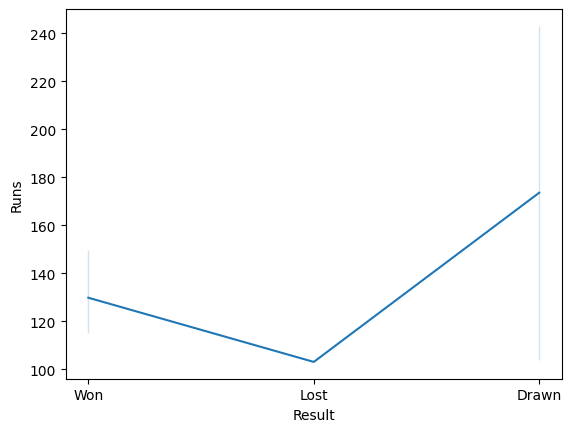

In [255]:
sns.lineplot(x='Result',y='Runs',data=against_data)

<Axes: xlabel='Ground', ylabel='Runs'>

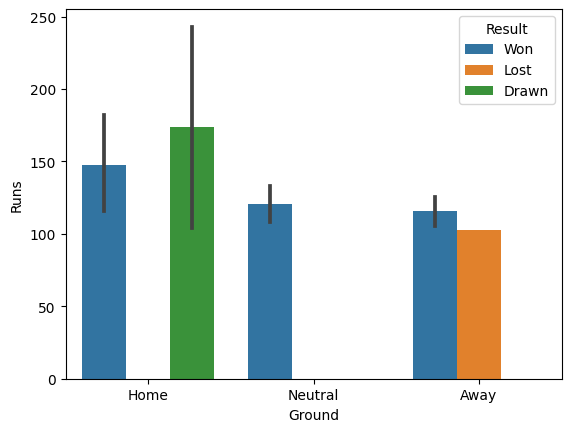

In [254]:
sns.barplot(x='Ground',y='Runs',hue='Result',data =against_data)

[Text(0, 0, '55'), Text(0, 0, '1'), Text(0, 0, '13'), Text(0, 0, '9'), Text(0, 0, '1'), Text(0, 0, '1')]


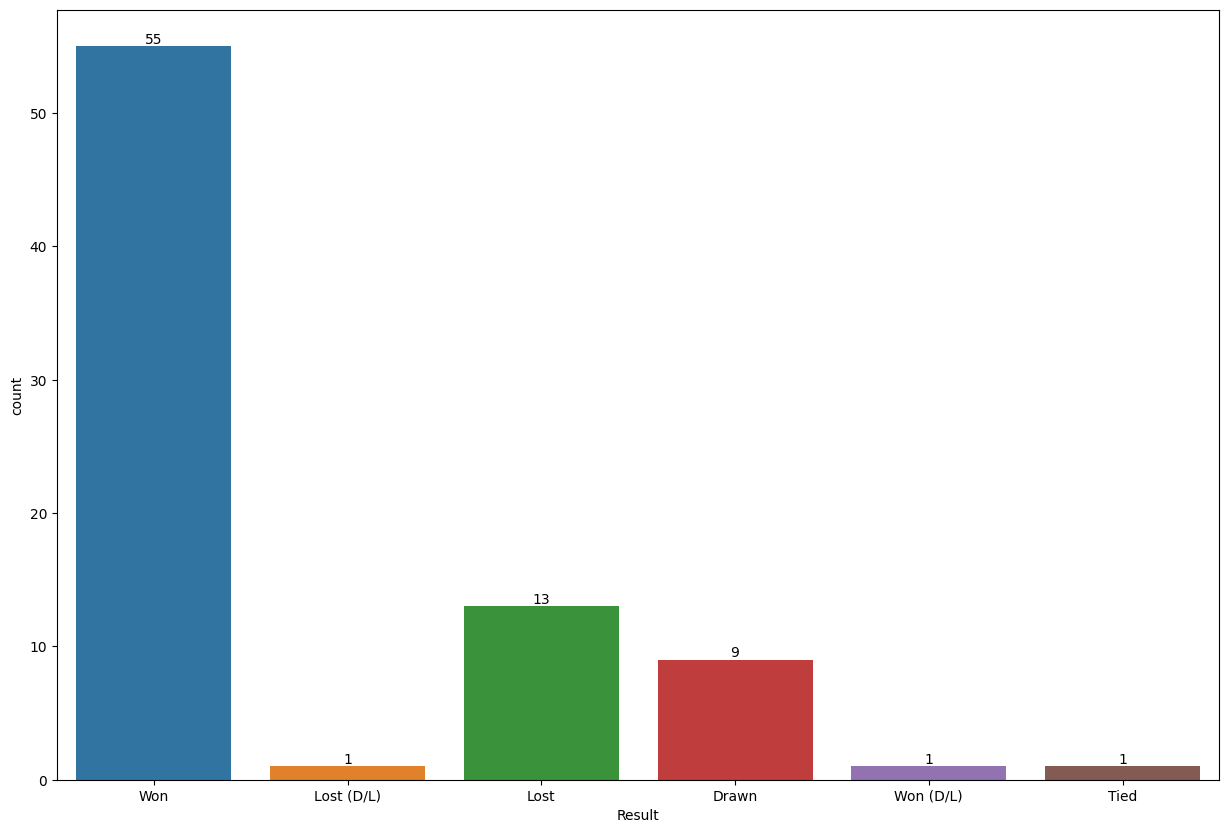

In [214]:
plt.figure(figsize=(15,10))
data = sns.countplot(x='Result',data =df)
for i in data.containers:
    print(data.bar_label(i))

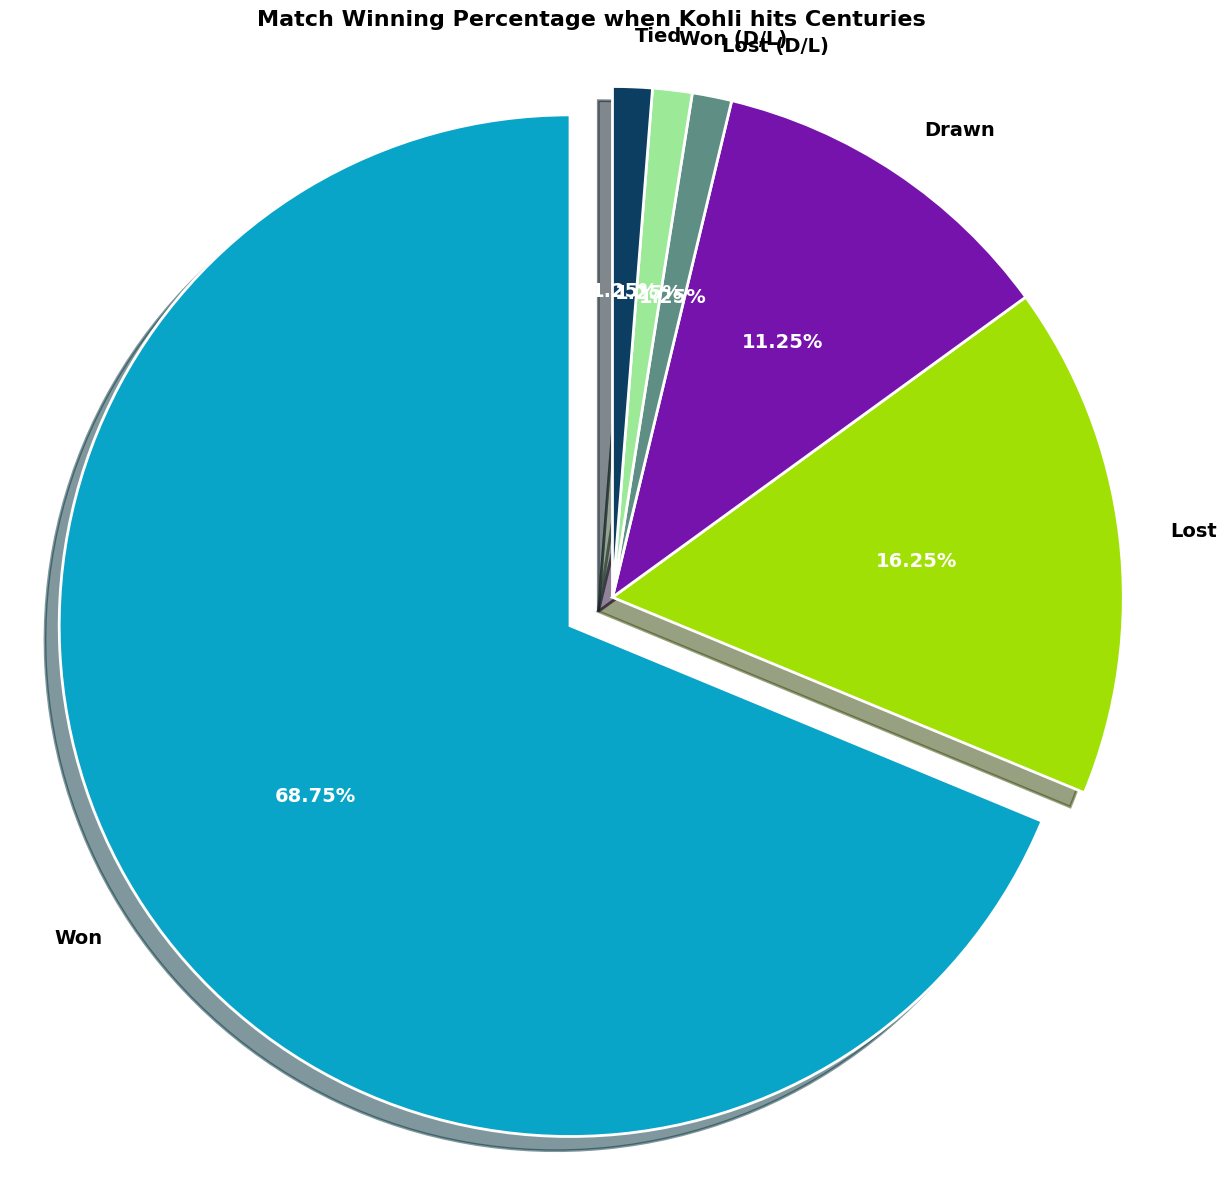

In [215]:
dic_data = dict(df.Result.value_counts())
labels = list(dic_data.keys())
sizes = list(dic_data.values())
# Generate a list of random colors
colors = [random_color() for _ in labels]

# Create an explode tuple the same length as labels, with the first item exploded
explode = (0.1,) + (0,) * (len(labels) - 1)
# ....................................................
# ...................................................
# Create a figure with a white background
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels,
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold', color='black')  # Set text color to white
    autotext.set(size=14, weight='bold', color='white')  # Set autotext color to white


# Add a title
ax.set_title('Match Winning Percentage when Kohli hits Centuries', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

[Text(0, 0, '37'), Text(0, 0, '36'), Text(0, 0, '6')]


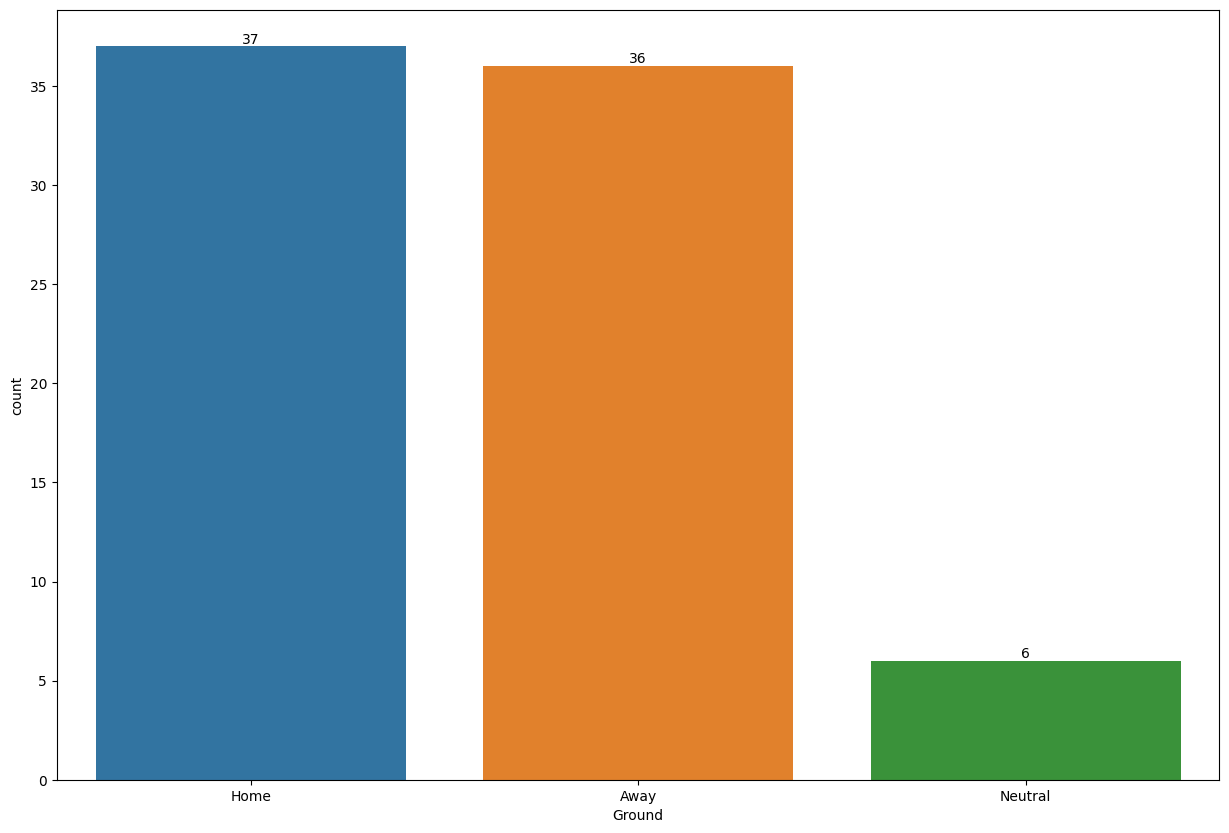

In [216]:
plt.figure(figsize=(15,10))
data = sns.countplot(x='Ground',data =df)
for i in data.containers:
    print(data.bar_label(i))

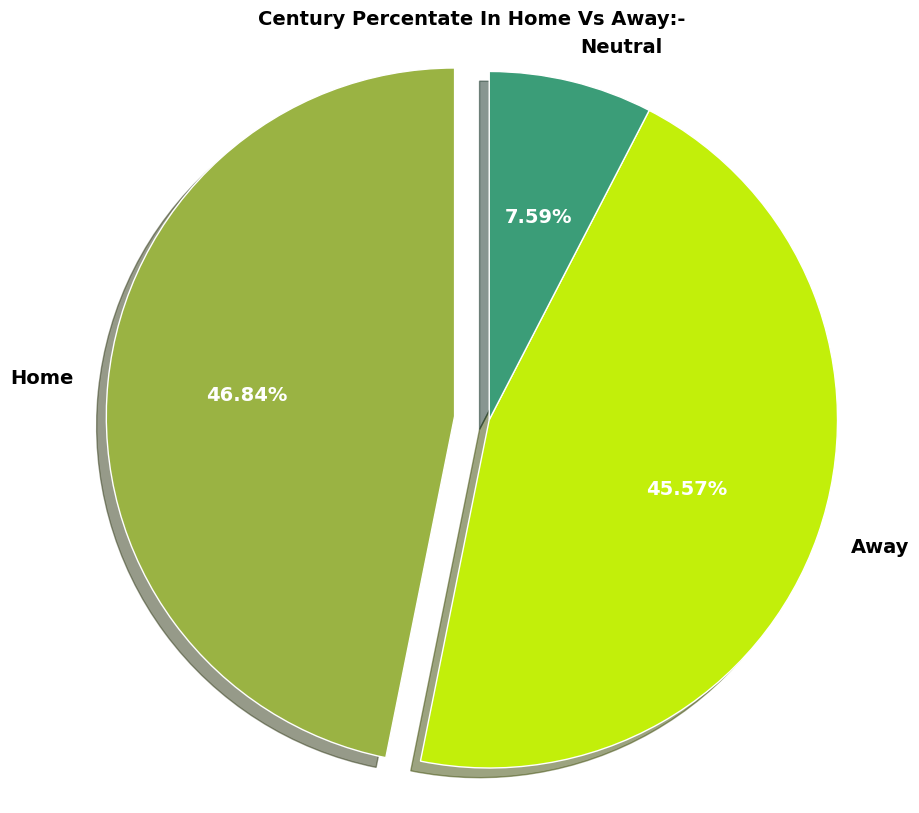

In [217]:
dic_data = dict(df.Ground.value_counts())
labels = list(dic_data.keys())
sizes = list(dic_data.values())
# Generate a list of random colors
colors = [random_color() for _ in labels]

# Create an explode tuple the same length as labels, with the first item exploded
explode = (0.1,) + (0,) * (len(labels) - 1)
# ....................................................
# ...................................................
# Create a figure with a white background
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels,
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold', color='black')  # Set text color to white
    autotext.set(size=14, weight='bold', color='white')  # Set autotext color to white


# Add a title
ax.set_title('Century Percentate In Home Vs Away:-', fontsize=14, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [218]:
df['Venue'].value_counts()

Venue
Adelaide Oval, Adelaide                                  5
Eden Gardens, Kolkata                                    4
R. Premadasa Stadium, Colombo                            4
Sher-e-Bangla Cricket Stadium, Dhaka                     4
Queen's Park Oval, Port of Spain                         4
Maharashtra Cricket Association Stadium, Pune            3
Vidarbha Cricket Association Stadium, Nagpur             3
Wankhede Stadium, Mumbai                                 3
JSCA International Stadium, Ranchi                       2
APCA-VDCA Stadium, Visakhapatnam                         2
Feroz Shah Kotla Ground, Delhi                           2
M. A. Chidambaram Stadium, Chennai                       2
ACA Stadium, Guwahati                                    2
ACA-VDCA Cricket Stadium, Visakhapatnam                  2
Galle International Stadium, Galle                       2
Melbourne Cricket Ground, Melbourne                      2
SuperSport Park, Centurion                        

[Text(0, 0, '33'), Text(0, 0, '42'), Text(0, 0, '3'), Text(0, 0, '2')]


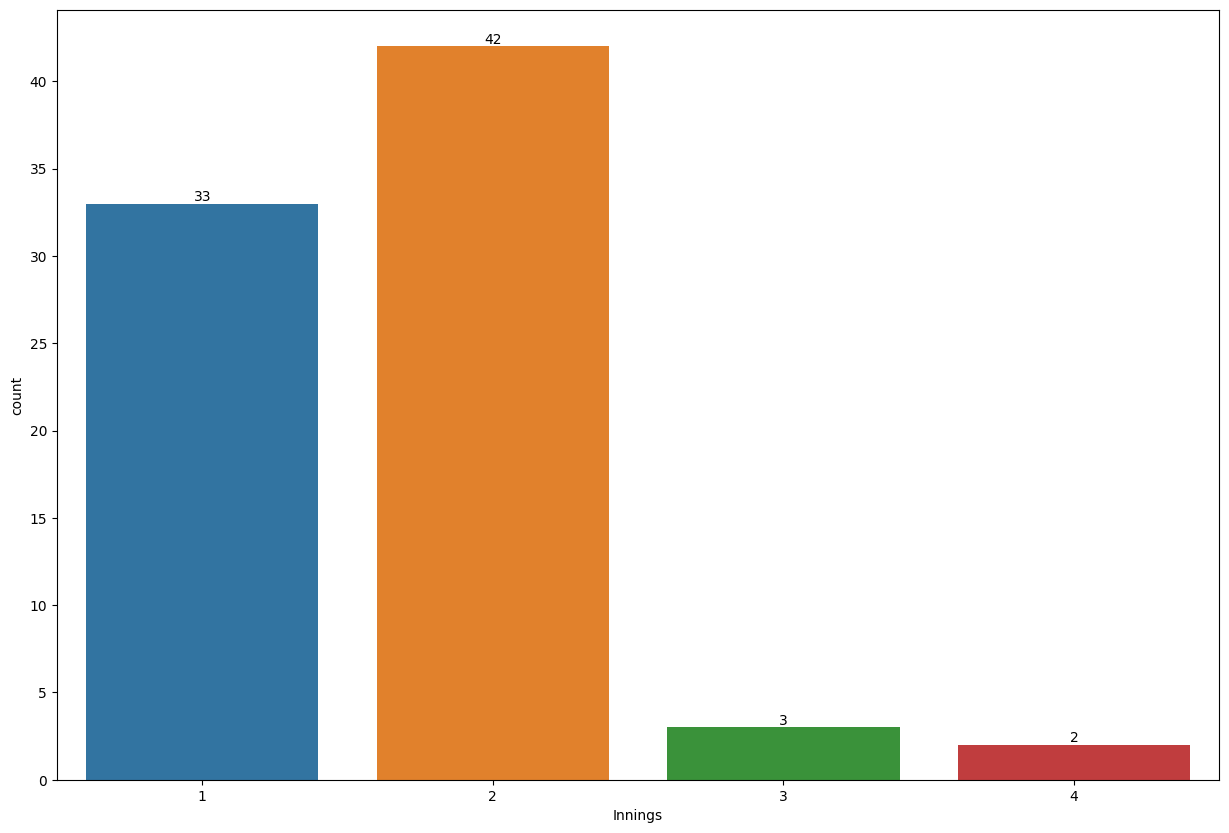

In [219]:
plt.figure(figsize=(15,10))
data = sns.countplot(x='Innings',data =df)
for i in data.containers:
    print(data.bar_label(i))

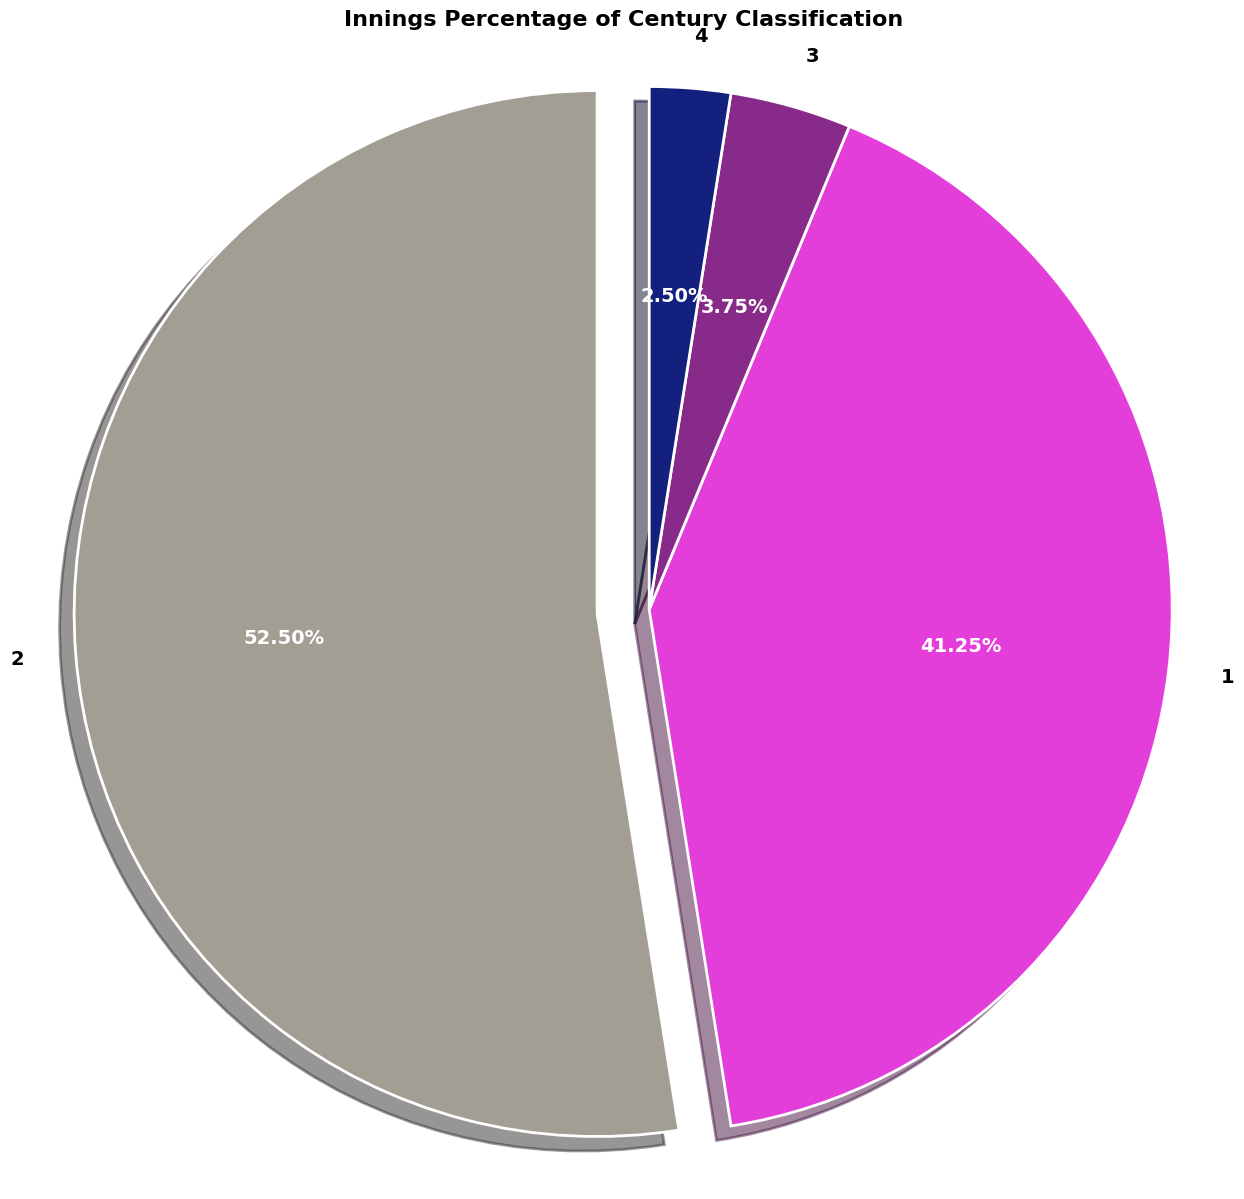

In [220]:
dic_data = dict(df.Innings.value_counts())
labels = list(dic_data.keys())
sizes = list(dic_data.values())
# Generate a list of random colors
colors = [random_color() for _ in labels]

# Create an explode tuple the same length as labels, with the first item exploded
explode = (0.1,) + (0,) * (len(labels) - 1)
# ....................................................
# ...................................................
# Create a figure with a white background
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels,
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold', color='black')  # Set text color to white
    autotext.set(size=14, weight='bold', color='white')  # Set autotext color to white


# Add a title
ax.set_title('Innings Percentage of Century Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

<Axes: xlabel='Position', ylabel='Runs'>

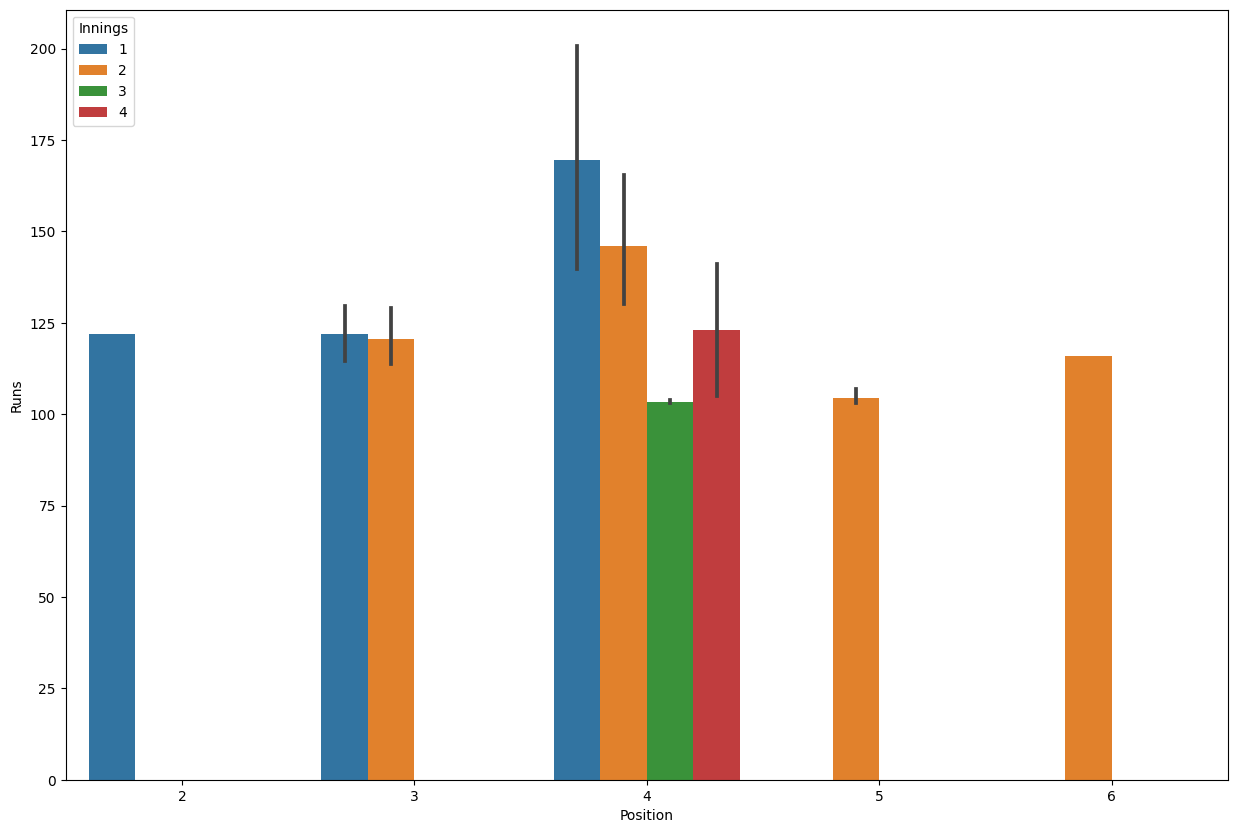

In [221]:
plt.figure(figsize=(15,10))
sns.barplot(x='Position',y='Runs',hue='Innings',data=df)

<Axes: xlabel='Position', ylabel='Runs'>

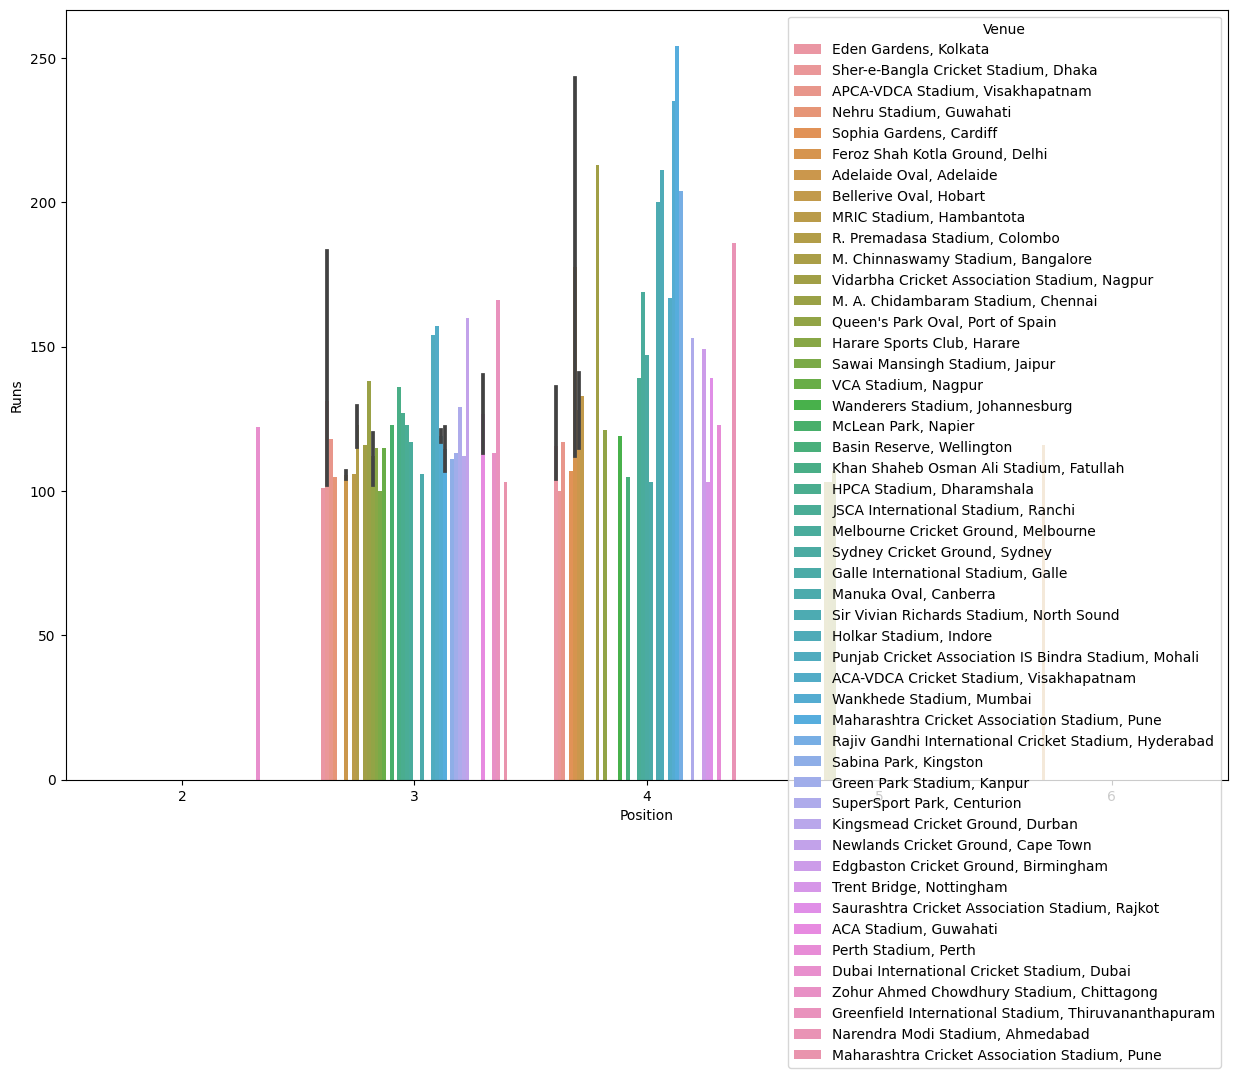

In [222]:
plt.figure(figsize=(15,10))
sns.barplot(x='Position',y='Runs',hue='Venue',data=df)

<Axes: xlabel='Position', ylabel='Runs'>

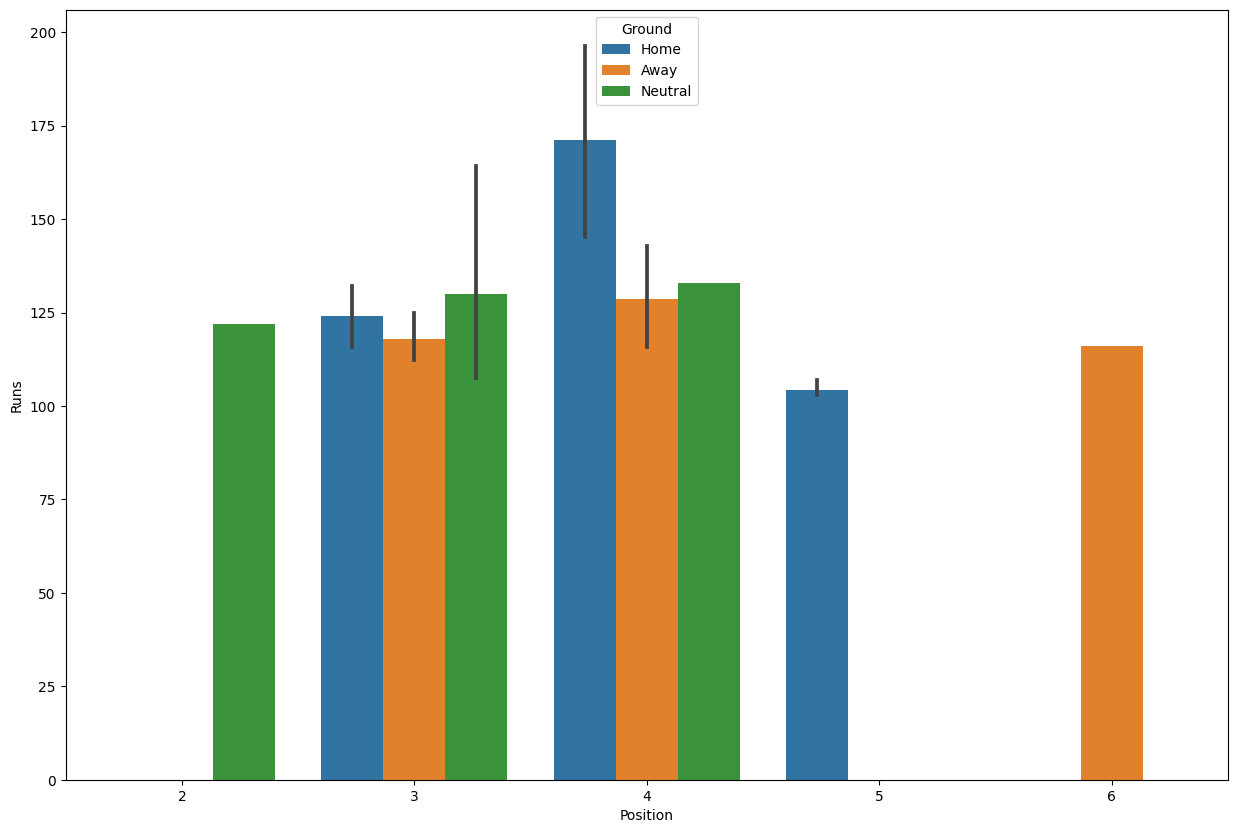

In [223]:
plt.figure(figsize=(15,10))
sns.barplot(x='Position',y='Runs',hue='Ground',data=df)

<Axes: xlabel='Position', ylabel='Runs'>

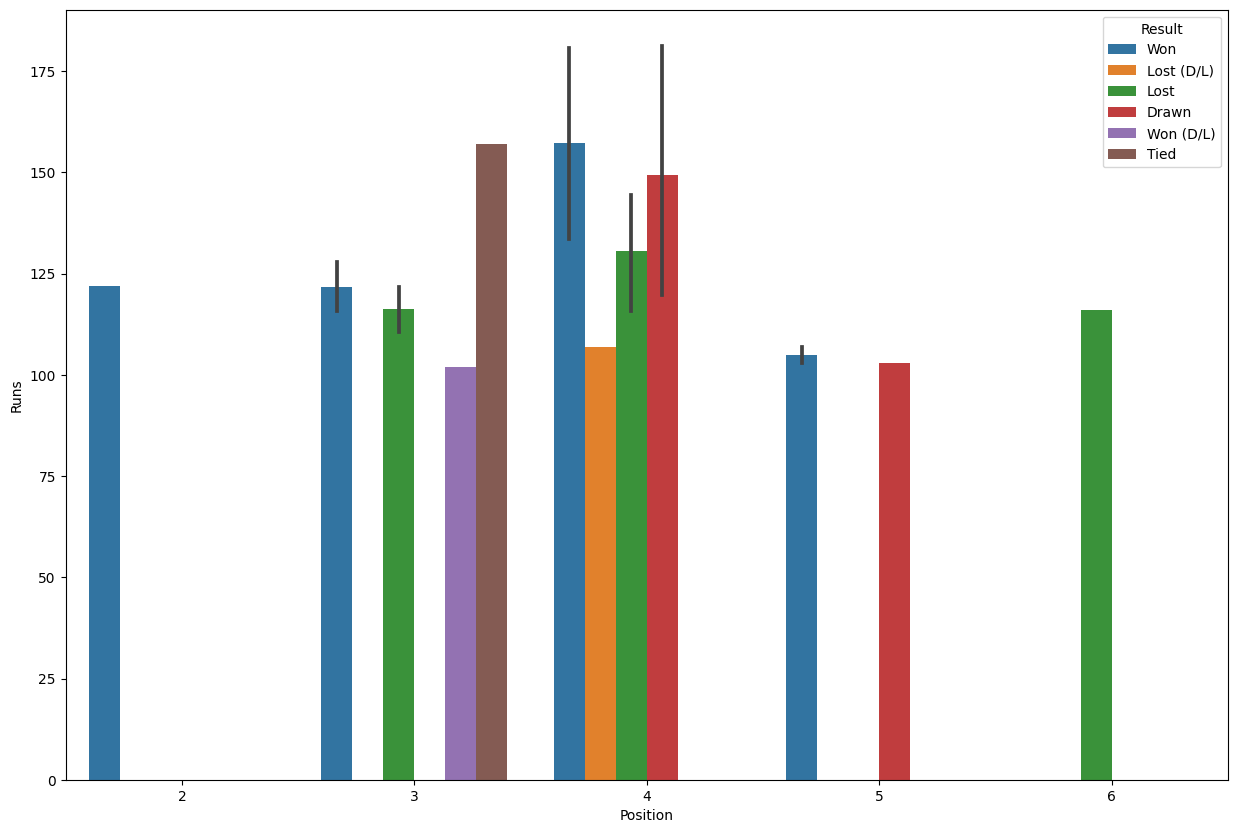

In [224]:
plt.figure(figsize=(15,10))
sns.barplot(x='Position',y='Runs',hue='Result',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Position', ylabel='Count'>

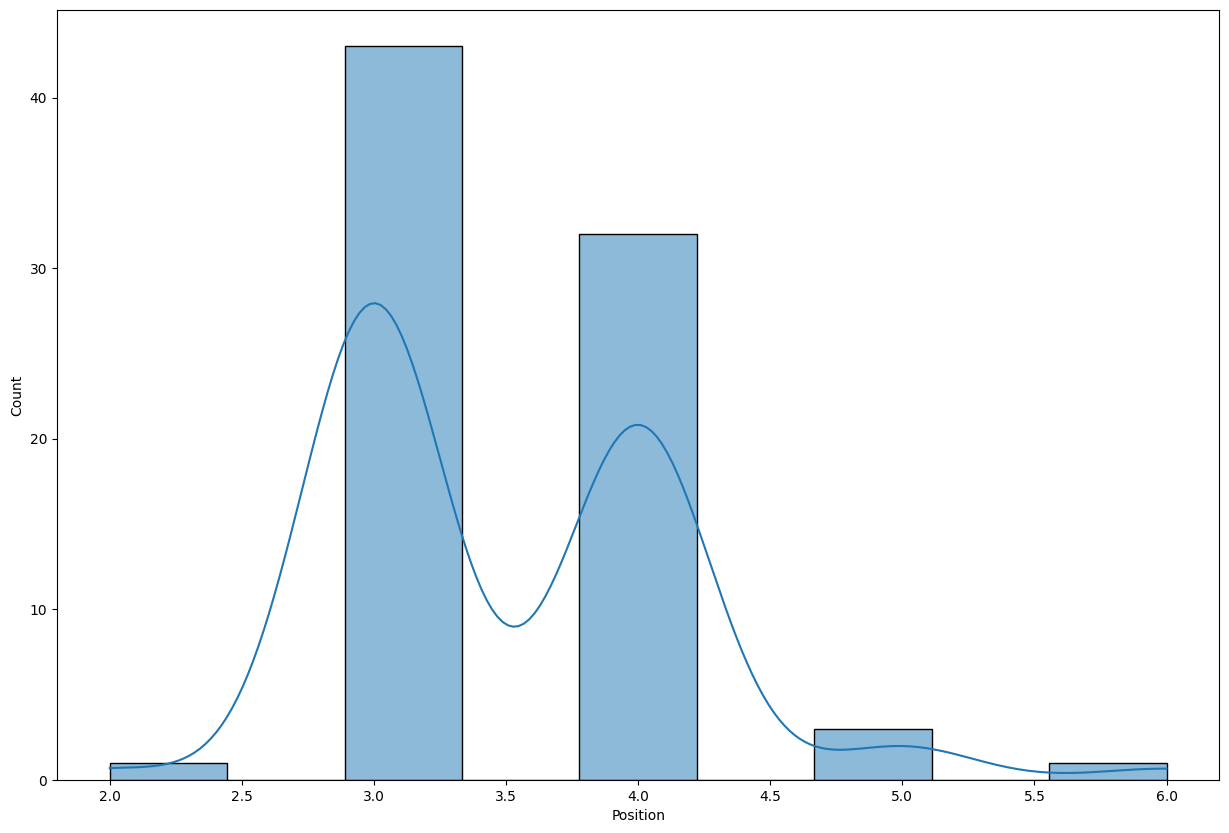

In [225]:
plt.figure(figsize=(15,10))
sns.histplot(df['Position'],kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Runs', ylabel='Count'>

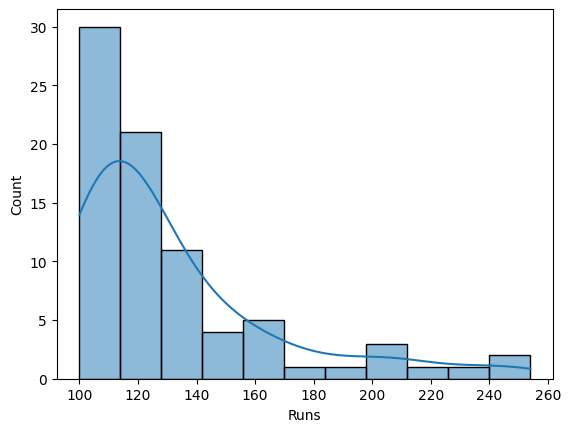

In [226]:
sns.histplot(df['Runs'],kde=True)

<Axes: xlabel='Against', ylabel='Runs'>

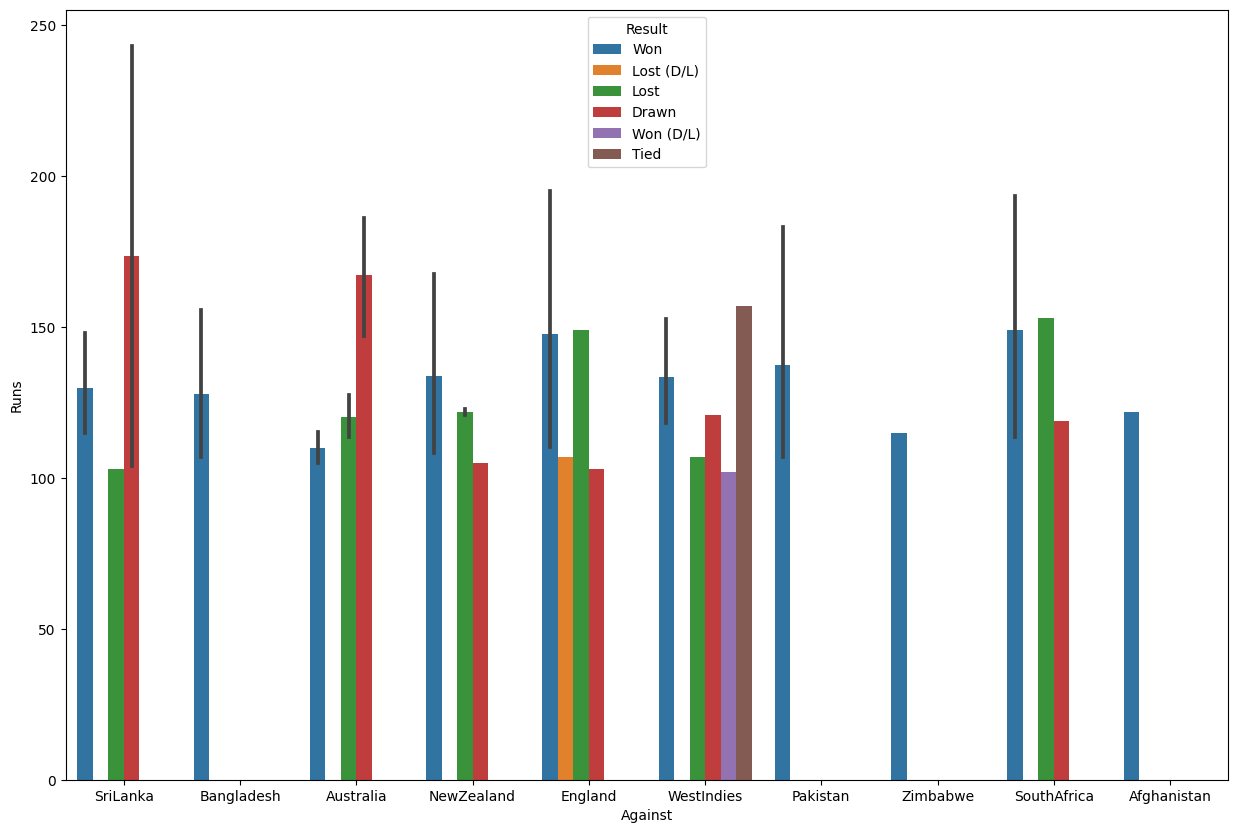

In [227]:
plt.figure(figsize=(15,10))
sns.barplot(x='Against',y='Runs',hue='Result',data=df)

<Axes: xlabel='Against', ylabel='Runs'>

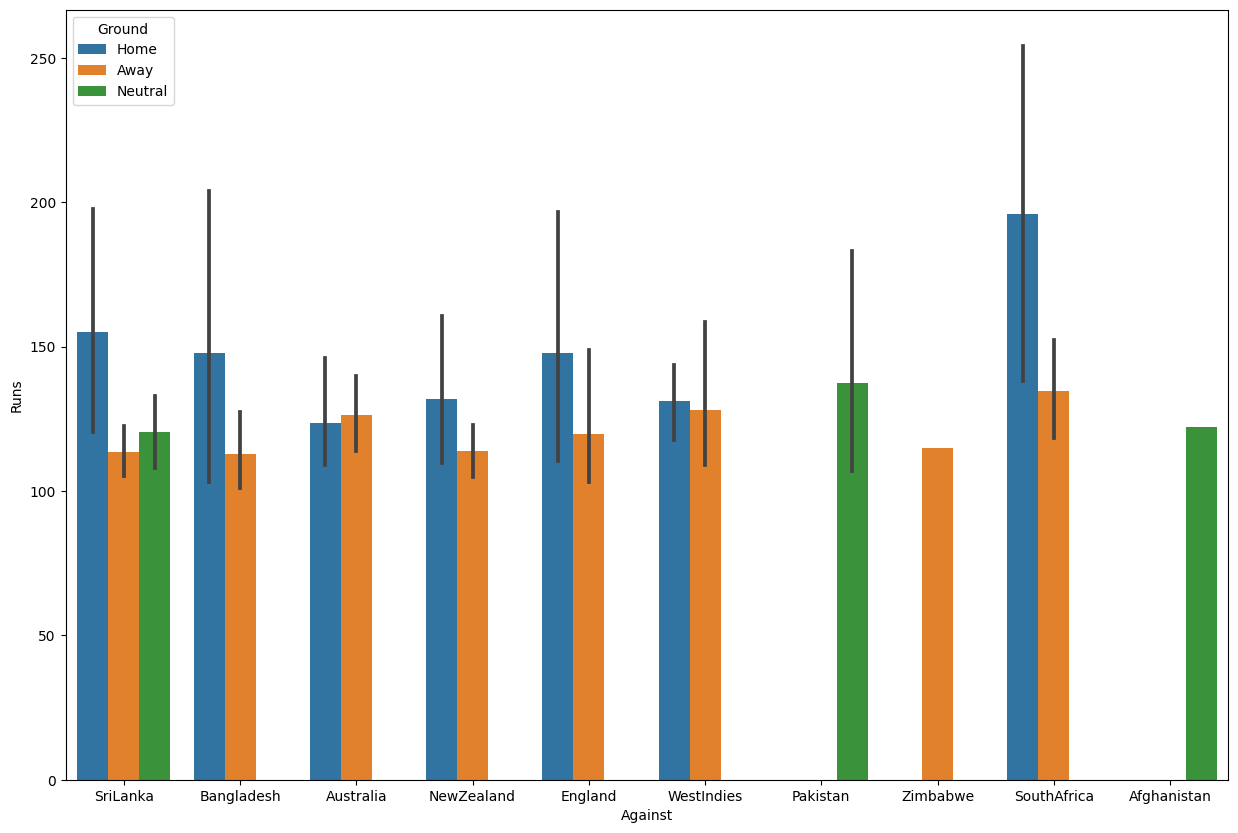

In [228]:
plt.figure(figsize=(15,10))
sns.barplot(x='Against',y='Runs',hue='Ground',data=df)

<Axes: xlabel='Against', ylabel='Runs'>

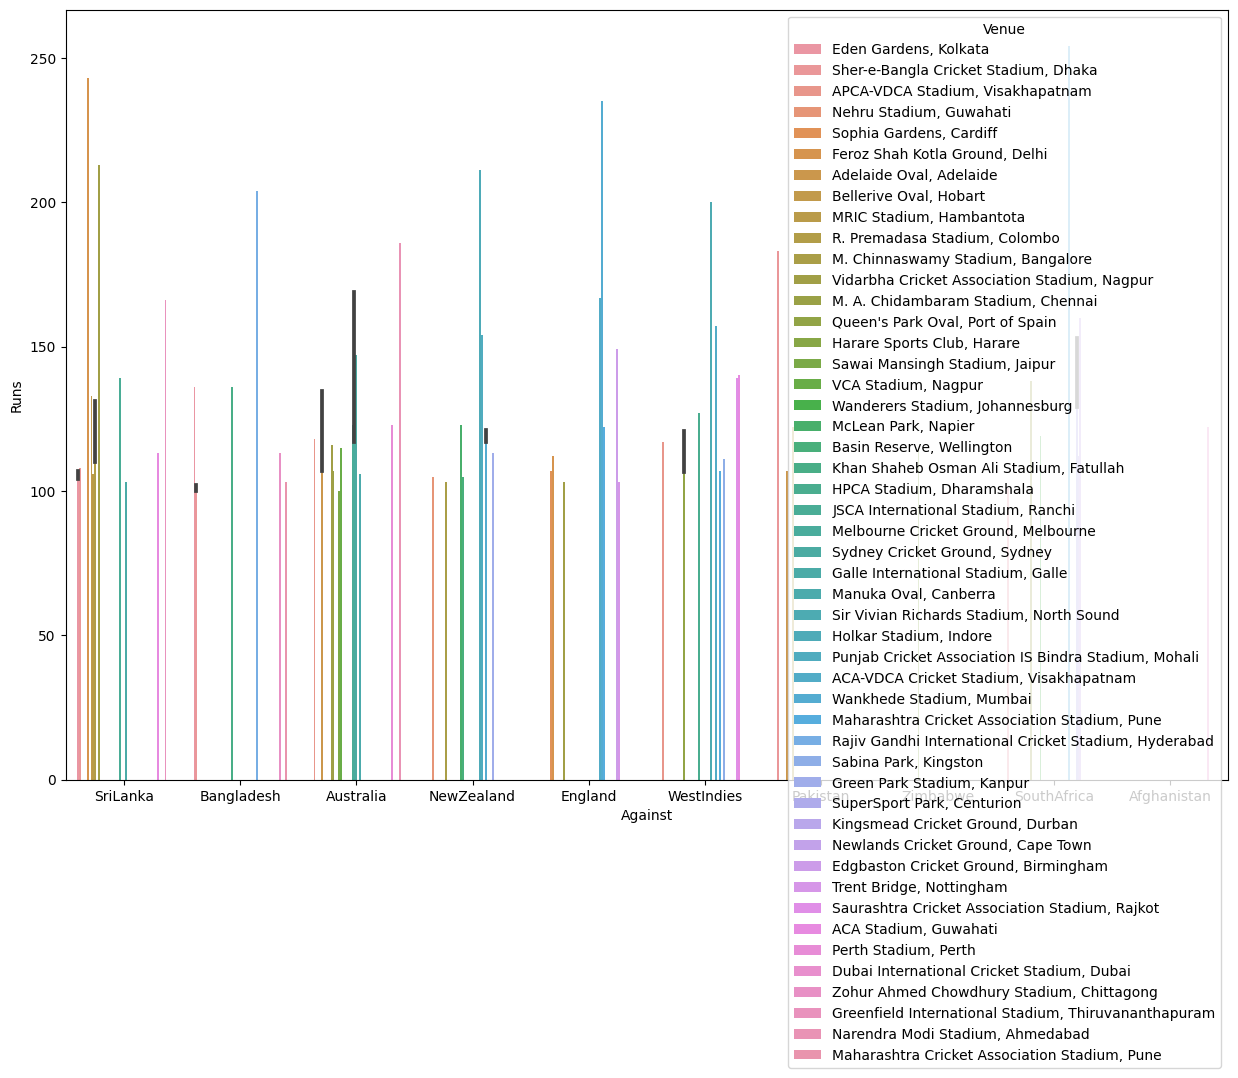

In [229]:
plt.figure(figsize=(15,10))
sns.barplot(x='Against',y='Runs',hue='Venue',data=df)

<Axes: xlabel='Against', ylabel='Runs'>

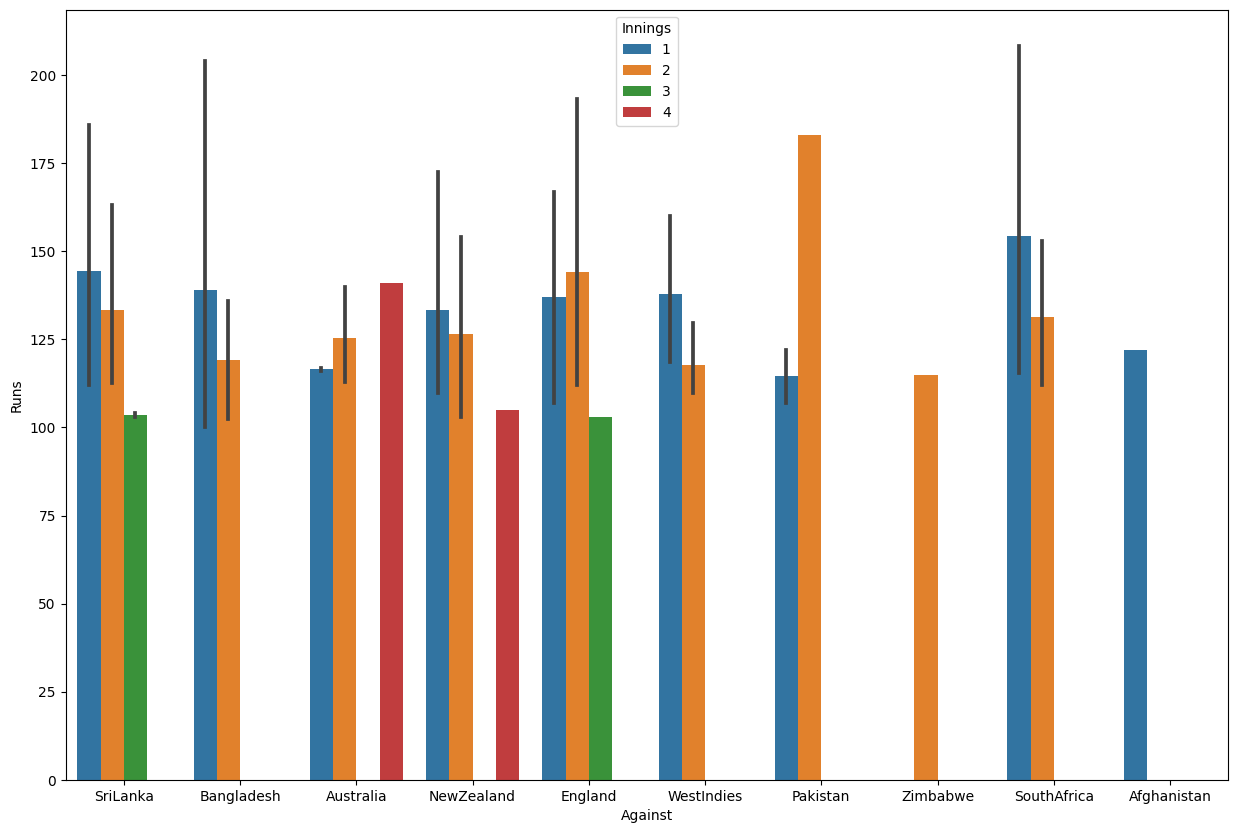

In [230]:
plt.figure(figsize=(15,10))
sns.barplot(x='Against',y='Runs',hue='Innings',data=df)

In [231]:
df['Position'].value_counts()

Position
3    43
4    32
5     3
6     1
2     1
Name: count, dtype: int64

[Text(0, 0, '1'), Text(0, 0, '43'), Text(0, 0, '32'), Text(0, 0, '3'), Text(0, 0, '1')]


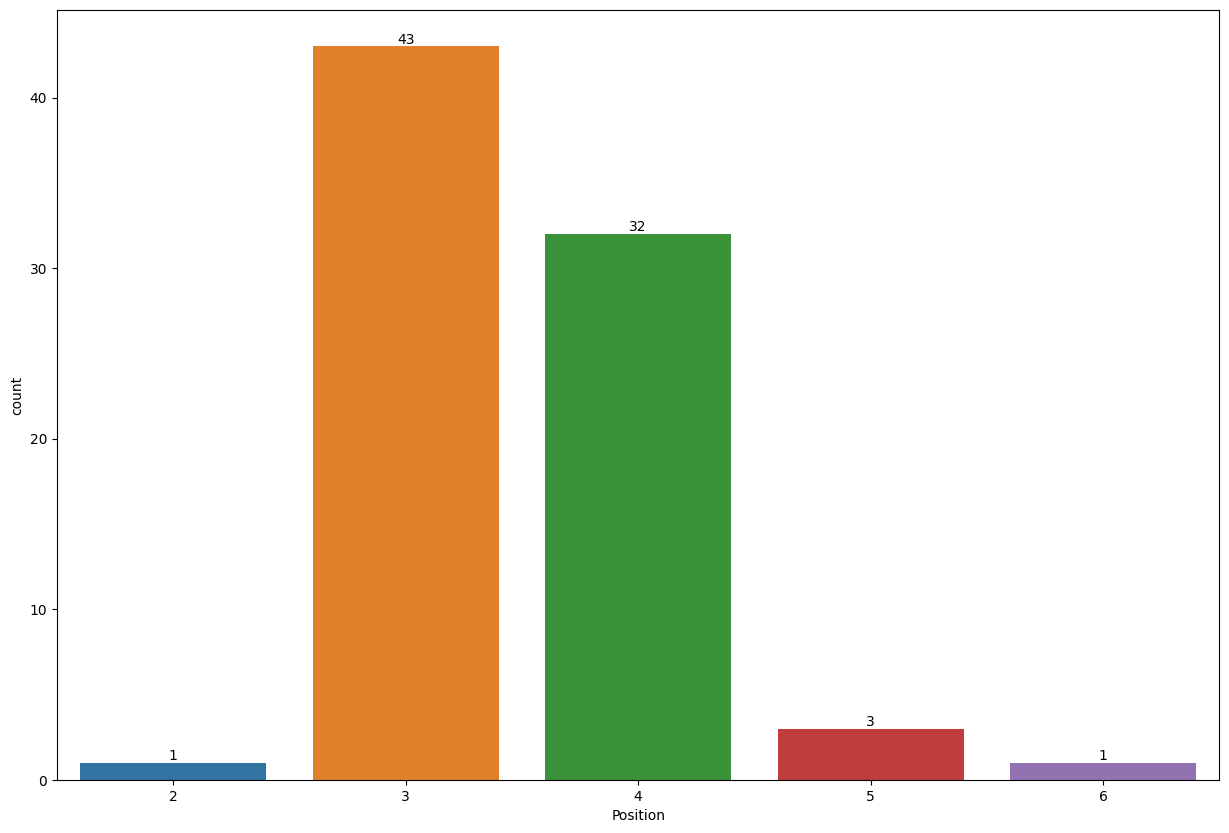

In [232]:
plt.figure(figsize=(15,10))
data = sns.countplot(x='Position',data =df)
for i in data.containers:
    print(data.bar_label(i))


In [233]:
df['Against'].value_counts()

Against
Australia      16
SriLanka       15
WestIndies     12
NewZealand      9
England         8
SouthAfrica     8
Bangladesh      7
Pakistan        3
Zimbabwe        1
Afghanistan     1
Name: count, dtype: int64

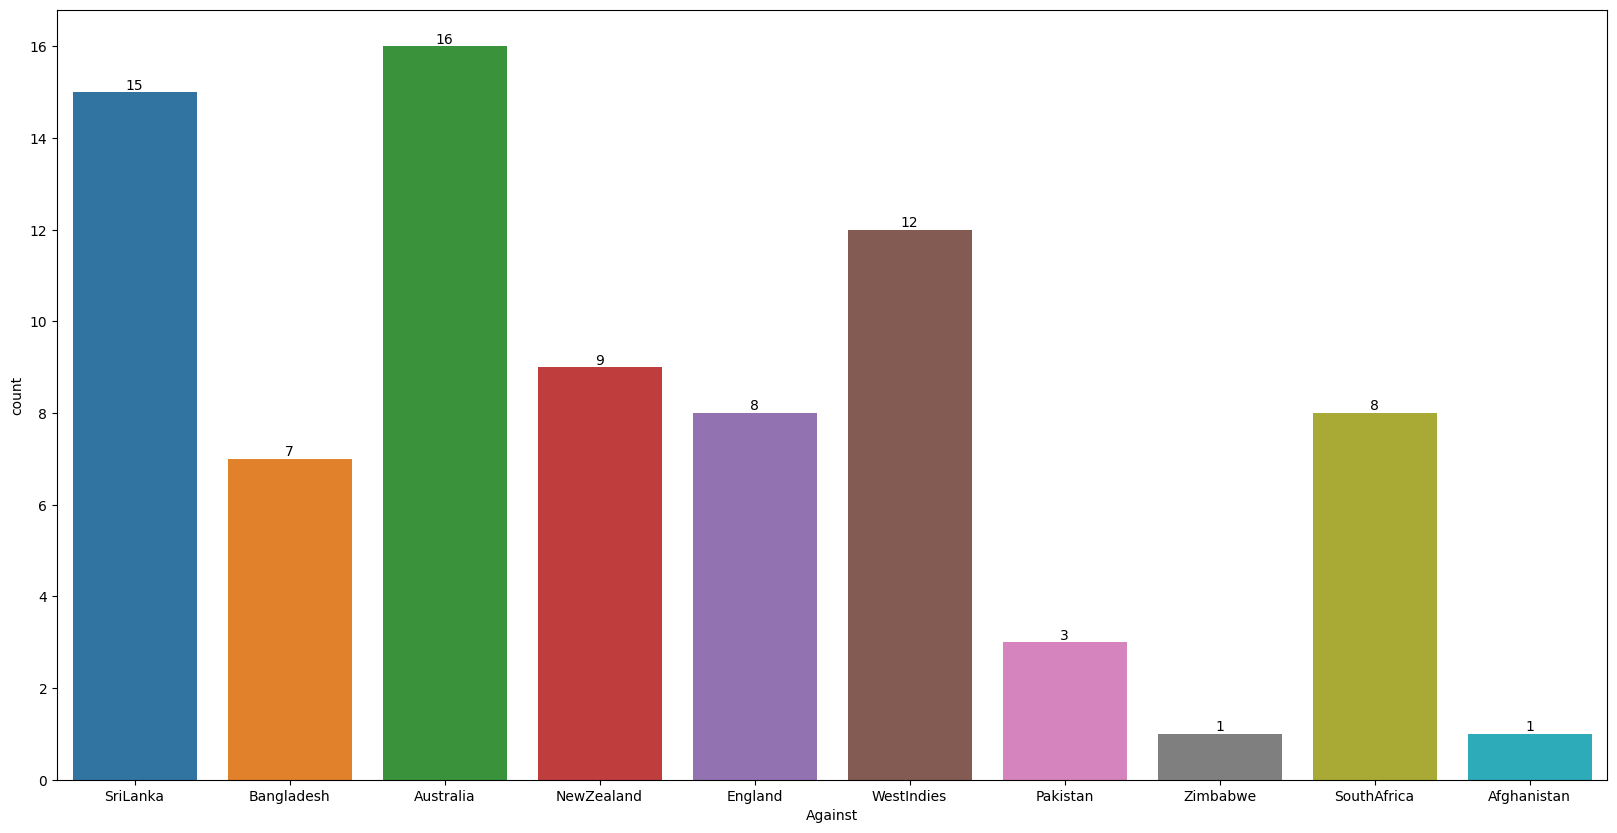

In [234]:
plt.figure(figsize=(20,10))
data = sns.countplot(x='Against',data =df)
for i in data.containers:
    data.bar_label(i)

In [235]:
import random
# Function to generate a random color
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

In [236]:
dic_data = dict(df.Against.value_counts())
labels = list(dic_data.keys())
sizes = list(dic_data.values())
# Generate a list of random colors
colors = [random_color() for _ in labels]

# Create an explode tuple the same length as labels, with the first item exploded
explode = (0.1,) + (0,) * (len(labels) - 1)

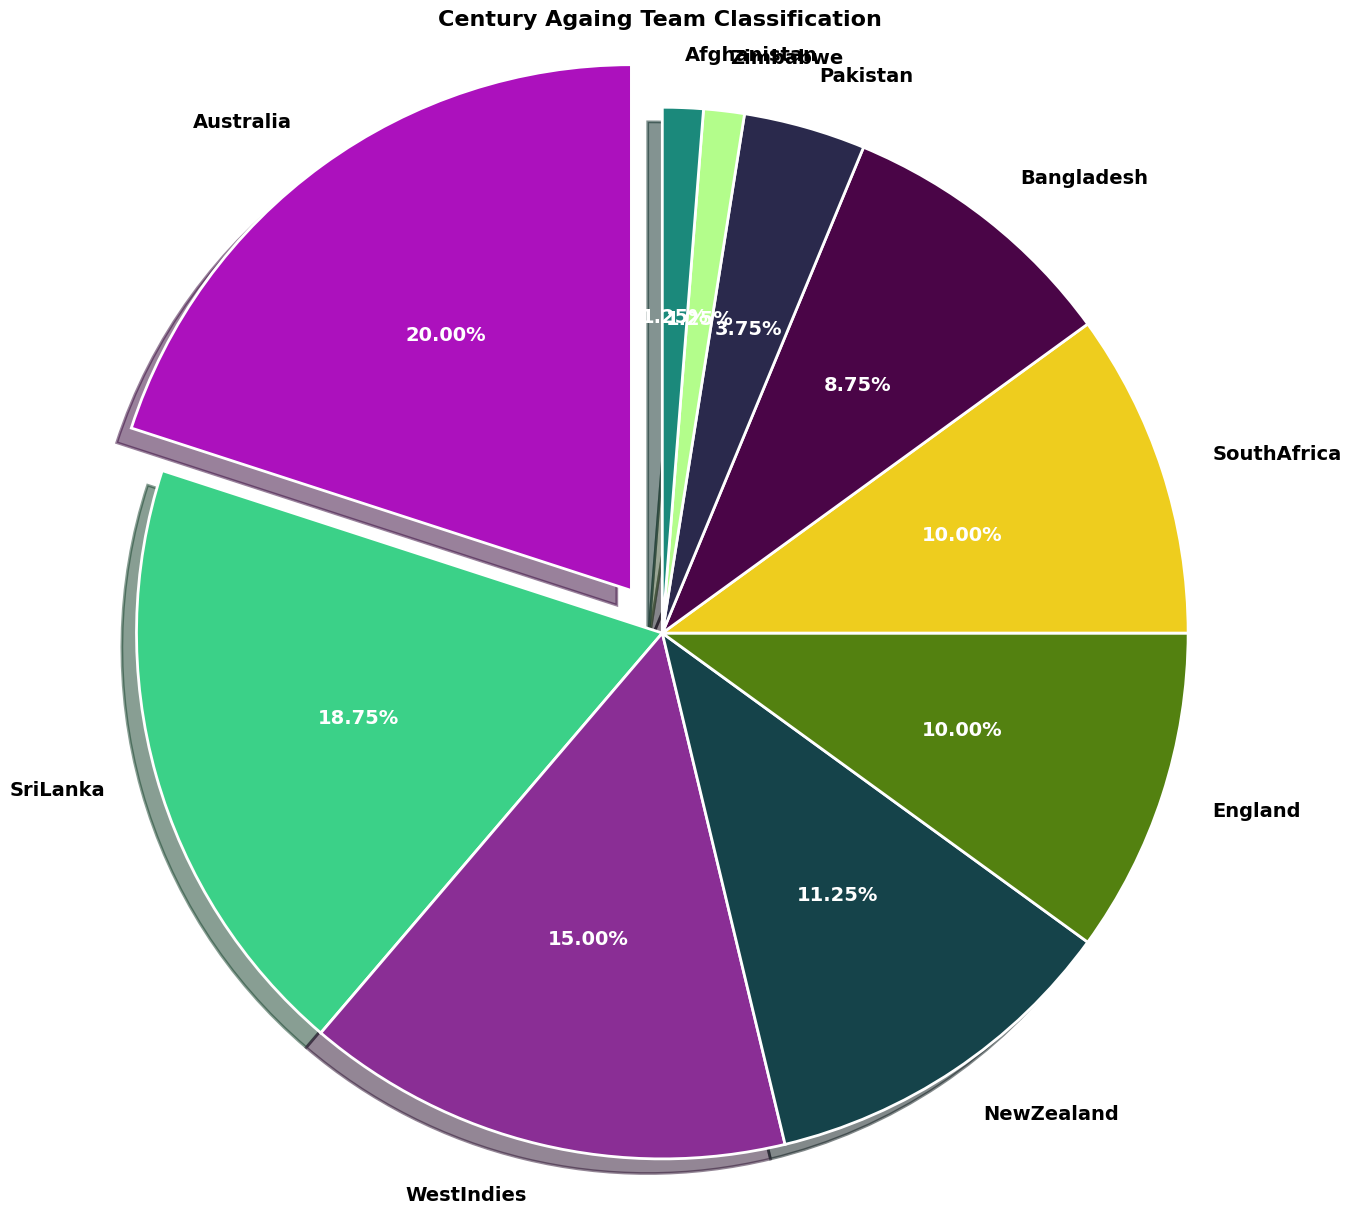

In [237]:

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels,
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold', color='black')  # Set text color to white
    autotext.set(size=14, weight='bold', color='white')  # Set autotext color to white


# Add a title
ax.set_title('Century Againg Team Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [238]:
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,SriLanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,NewZealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [239]:
df[df['Runs']==df['Runs'].min()]

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won
19,20,100,Australia,3,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won


In [240]:
df[df['Runs']==df['Runs'].max()]

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
68,69,254,SouthAfrica,4,1,"Maharashtra Cricket Association Stadium, Pune",Home,10-Oct-19,Won


In [241]:
df.describe()

,No.,Runs,Position,Innings
count,80.0000,80.000000,80.000000,80.00000
mean,40.5000,131.550000,3.500000,1.67500
std,23.2379,35.094772,0.656033,0.67082
min,1.0000,100.000000,2.000000,1.00000
25%,20.7500,107.000000,3.000000,1.00000
50%,40.5000,118.500000,3.000000,2.00000
75%,60.2500,139.250000,4.000000,2.00000
max,80.0000,254.000000,6.000000,4.00000


/tmp/ipykernel_30/2844822996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Runs'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Runs', ylabel='Density'>

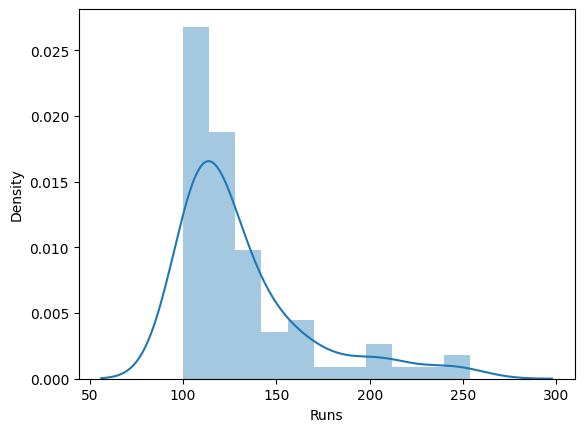

In [242]:
sns.distplot(df['Runs'])

<Axes: >

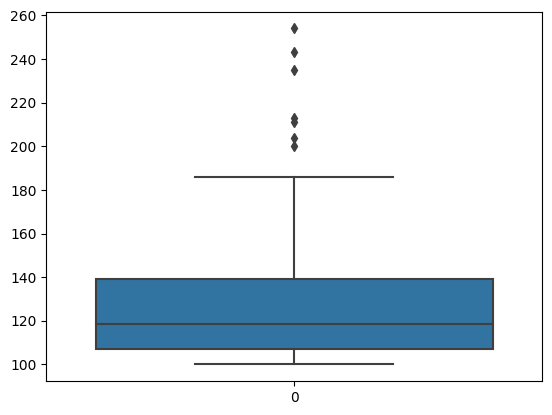

In [243]:
sns.boxplot(df['Runs'])

In [244]:
df.drop(columns=['No.'],inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

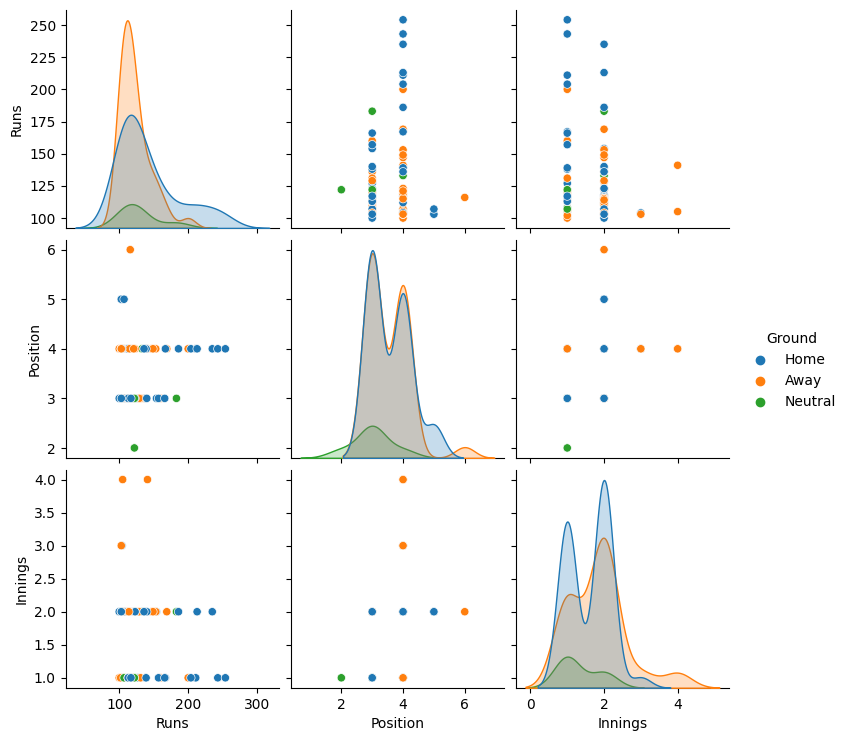

In [245]:
sns.pairplot(data=df,hue='Ground')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

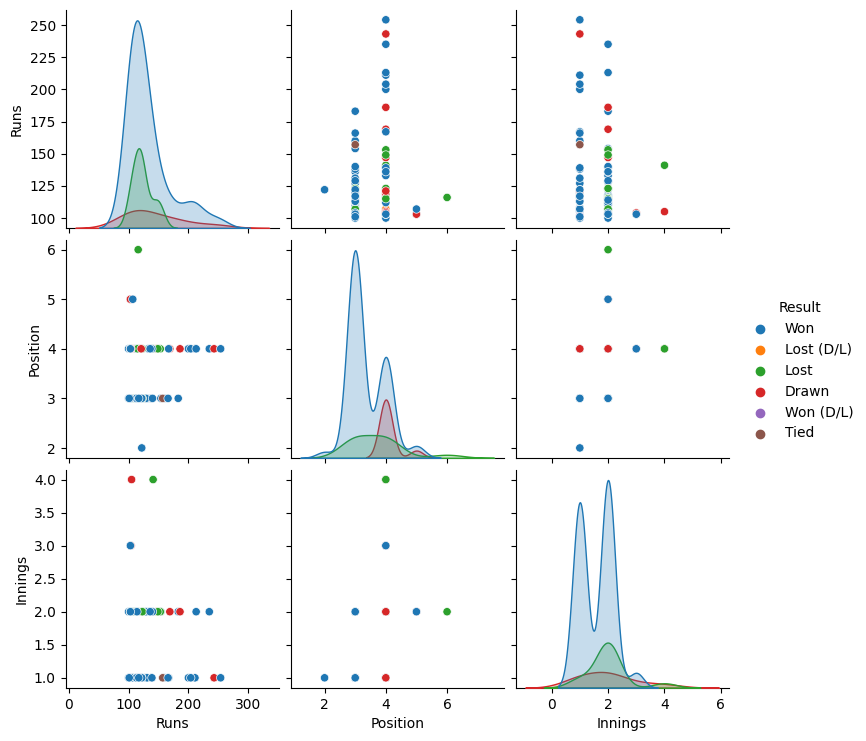

In [246]:
sns.pairplot(data=df,hue='Result')

In [324]:
# Virat Kohli Better Performace Against Srianka , Austrial & Winning percentae is high when he playing secords in ODI's and Test in I and III...

# Againt Austrial Vs Sriklan Home or Way IN both of Then are well performace.... 